# Projet : Temporal Data Analysis


## À propos

- **Auteur** : Mohammed Ali EL ADLOUNI  
- **Master** : Master M2 MALIA 
- **Date** : 23/12/2024  

Ce projet a pour objectif d'explorer et de modéliser une série temporelle de tâches solaires (sunspot) sur la période de 1700 à 1988. La tâche consiste à charger, analyser, nettoyer les données et appliquer des méthodes statistiques descriptives et inférentielles pour prédire les valeurs futures de cette série. Les méthodes utilisées incluent la décomposition, la modélisation  SARIMA, avec des étapes essentielles d'évaluation et de validation des prédictions. 


## Nettoyage et analyse des données (statistique descriptive)


On importe les librairies nécessaires pour la suite

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib notebook
%matplotlib inline
from fonctions import *
import fonctions as fct
from statsmodels.tsa.seasonal import seasonal_decompose, STL  # Importe les fonctions pour la décomposition saisonnière
from statsmodels.tsa.api import ExponentialSmoothing  # Importe le modèle de lissage exponentiel



ModuleNotFoundError: No module named 'pandas'

Tout d'abord, on commence par lire les données temporelles qui sont gardées au format CSV

In [343]:
sunspot = pd.read_csv("sunspot.csv", index_col="t")


On commence directement la phase exploration des données. Cela est important car ça va nous permettre de comprendre nos données et de pouvoir les modéliser et analyser correctement par la suite !

In [344]:
print(f"sunspot dataset shape : {sunspot.shape}\n")

print(sunspot.info())

sunspot dataset shape : (289, 1)

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 1700 to 1988
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sunspot  286 non-null    float64
dtypes: float64(1)
memory usage: 4.5 KB
None


<div style="background-color: #28a745; color: white; padding: 15px; border-radius: 5px;">
<h3>Interprétation des résultats</h3>

- **Dimensions** : (289, 1)  
  Le dataset contient 289 lignes et 1 colonne.  
- **Index** : Va de l'année 1700 à 1988.  
- **Informations sur les colonnes** :  
  - `sunspot` : Contient les données sur le nombre de tâches solaires.  
  - Valeurs nulles : 3 sur 289 entrées sont nulles.  
  - Type de données : `float64`.  
</div>


In [345]:
sunspot.describe()

sunspot
count  286.000000
mean    47.801748
std     40.046048
min      1.000000
25%     13.900000
50%     37.700000
75%     68.700000
max    190.200000

In [346]:
print(sunspot.head(5))


      sunspot
t            
1700      5.0
1701     11.0
1702     16.0
1703     23.0
1704     36.0


In [347]:
print(sunspot.tail(5))


      sunspot
t            
1984     45.9
1985     17.9
1986     13.4
1987     29.2
1988    100.2


<div style="background-color: #28a745; color: white; padding: 15px; border-radius: 5px;">
<h3>Interprétation des résultats</h3>

- **Résumé statistique (`sunspot.describe()`) :**  
  - Count : 286 valeurs non nulles.  
  - Mean : La moyenne des tâches solaires est d'environ 47,80.  
  - Std : L'écart type est de 40,05, indiquant une variabilité dans les nombres de tâches solaires.  
  - Min : La valeur minimale enregistrée est 1,0.  
  - 25e centile : 13,9 (25 % des valeurs sont inférieures à cette valeur).  
  - Médiane (50e centile) : 37,7.  
  - 75e centile : 68,7 (75 % des valeurs sont inférieures à cette valeur).  
  - Max : La valeur maximale enregistrée est 190,2.  
</div>


On s'assure que l'index est traité comme une série temporelle (années)

In [348]:
# Ensure the index is treated as a time series (years)
sunspot.index = pd.to_datetime(sunspot.index, format='%Y')


In [349]:
sunspot.head()

sunspot
t                  
1700-01-01      5.0
1701-01-01     11.0
1702-01-01     16.0
1703-01-01     23.0
1704-01-01     36.0

Maintenant, nous allons tracer la colonne des tâches solaires en fonction du temps (années) entre 1700 et 1988.

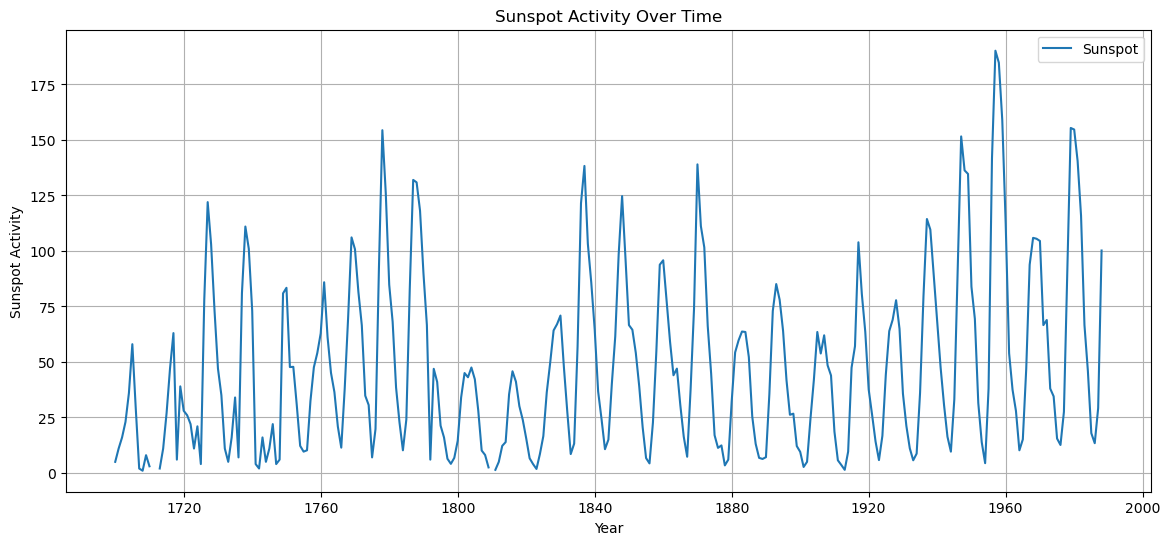

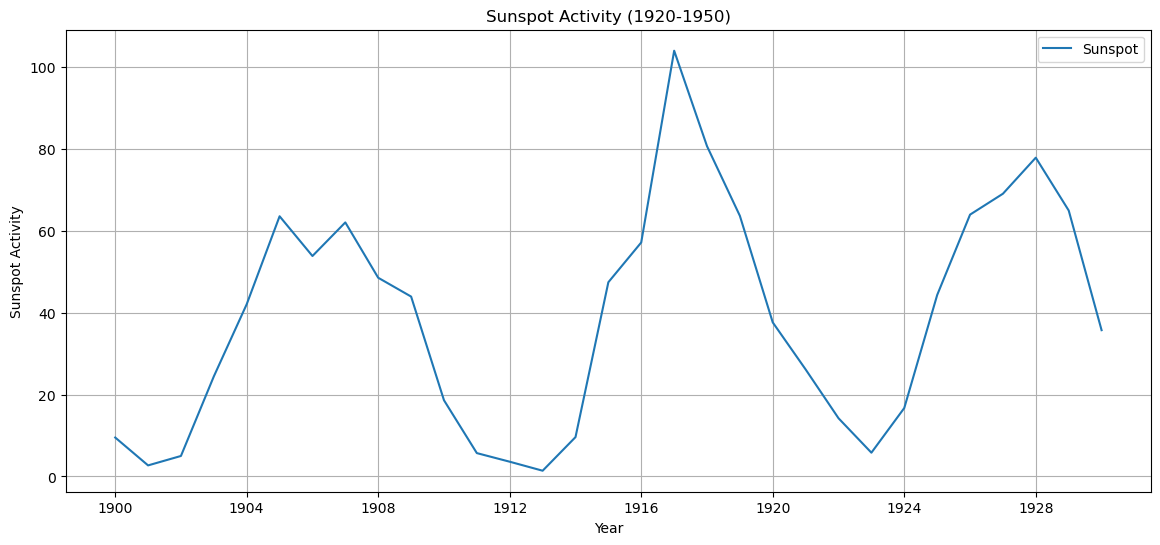

In [350]:
plt.figure(figsize=(14, 6))
plt.plot(sunspot.index, sunspot['sunspot'], label='Sunspot')
plt.xlabel("Year")
plt.ylabel("Sunspot Activity")
plt.title("Sunspot Activity Over Time")
plt.legend()
plt.grid()
plt.show()

filtered_sunspot = sunspot[(sunspot.index >= "1900-01-01") & (sunspot.index <= "1930-12-31")]
# Plot the filtered data
plt.figure(figsize=(14, 6))
plt.plot(filtered_sunspot.index, filtered_sunspot['sunspot'], label='Sunspot')
plt.xlabel("Year")
plt.ylabel("Sunspot Activity")
plt.title("Sunspot Activity (1920-1950)")
plt.legend()
plt.grid()
plt.show()


<div style="background-color: #28a745; color: white; padding: 15px; border-radius: 5px;">
<h3>Interprétation du graphique</h3>

- **Saisonnalité** : On observe une cyclicité claire avec des pics et des creux récurrents. Les cycles semblent se répéter environ tous les 11 ans, ce qui correspond au cycle solaire.

- **Variabilité** : L'amplitude des cycles varie. Certains cycles présentent des pics très élevés (par exemple, autour de 1780, 1860 et 1960), tandis que d'autres (notamment autour de 1810) montrent une période de faible activité des tâches solaires.
</div>


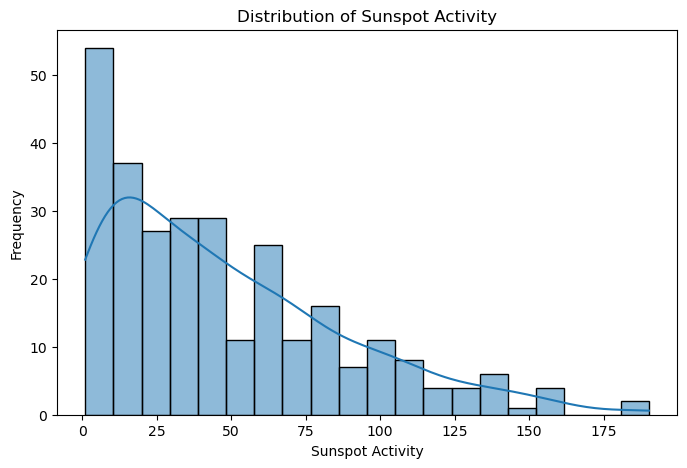

In [351]:
# Distribution plot
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(sunspot['sunspot'].dropna(), kde=True, bins=20)
plt.xlabel("Sunspot Activity")
plt.ylabel("Frequency")
plt.title("Distribution of Sunspot Activity")
plt.show()


<div style="background-color: #28a745; color: white; padding: 15px; border-radius: 5px;">
<h3>Interprétation du graphique</h3>

- La majorité des observations se concentrent entre 0 et 50, indiquant que les niveaux d'activité des tâches solaires sont généralement faibles.

- On observe une diminution notable de la fréquence au-delà de 50, avec des pics occasionnels jusqu'à environ 175.
</div>


On s"intéresse maintenant aux 3 valeurs manquantes (NaN) relevées au début de notre analyse descriptive. Puisuqe on a que 3 valeurs manquantes, on va utiliser l'interpolation qui va nous permettre rapidement et facilement de remplir ces valeurs manquantes. Les valeurs manquantes vont donc être calculées selon la relation suivante:

$$
y_i = y_{i-1} + \frac{(x_i - x_{i-1})}{(x_{i+1} - x_{i-1})} \times (y_{i+1} - y_{i-1})
$$


Cette ligne ci-dessous remplace les valeurs manquantes (NaN) dans la colonne sunspot par la moyenne des 3 valeurs voisines, calculée à l'aide d'une fenêtre glissante. La moyenne est calculée même si la fenêtre contient moins de 3 valeurs grâce à min_periods=1.

In [352]:
sunspot['sunspot'] = sunspot['sunspot'].fillna(sunspot['sunspot'].rolling(window=3, min_periods=1).mean())

print("Number of NaN values after interpolation:", sunspot['sunspot'].isna().sum())


Number of NaN values after interpolation: 0


Maintenant, nous allons vérifier s'il existe des valeurs aberrantes, puis nous examinerons comment les traiter correctement !








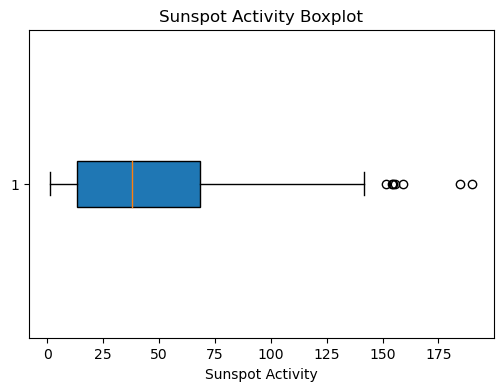

In [353]:
# Boxplot to check for outliers
plt.figure(figsize=(6, 4))
plt.boxplot(sunspot['sunspot'].dropna(), vert=False, patch_artist=True)
plt.xlabel("Sunspot Activity")
plt.title("Sunspot Activity Boxplot")
plt.show()


Nous allons maintenant utiliser la méthode de l'IQR pour obtenir le nombre exact et les années correspondantes des valeurs aberrantes !

In [354]:
# Calculate Q1 and Q3
Q1 = sunspot['sunspot'].quantile(0.25)
Q3 = sunspot['sunspot'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = sunspot[(sunspot['sunspot'] < lower_bound) | (sunspot['sunspot'] > upper_bound)]

# Count outliers
num_outliers = outliers.shape[0]

print(f"Number of outliers: {num_outliers}")

# Display outliers
print(outliers)

Number of outliers: 7
            sunspot
t                  
1778-01-01    154.4
1947-01-01    151.6
1957-01-01    190.2
1958-01-01    184.8
1959-01-01    159.0
1979-01-01    155.4
1980-01-01    154.7


Nous allons maintenant remplacer les valeurs aberrantes par le seuil non-aberrant le plus proche (par exemple, Q1 - 1,5 * IQR pour la borne inférieure ou Q3 + 1,5 * IQR pour la borne supérieure).



In [355]:
# Cap or clip outliers to the nearest threshold
sunspot['sunspot'] = sunspot['sunspot'].apply(
    lambda x: max(lower_bound, min(upper_bound, x))
)


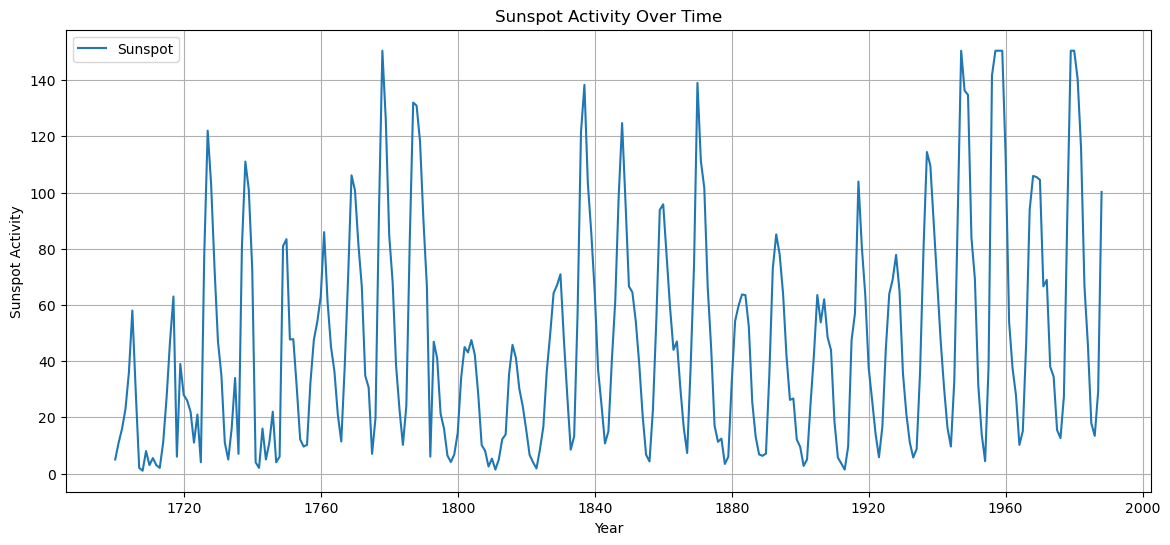

In [356]:
plt.figure(figsize=(14, 6))
plt.plot(sunspot.index, sunspot['sunspot'], label='Sunspot')
plt.xlabel("Year")
plt.ylabel("Sunspot Activity")
plt.title("Sunspot Activity Over Time")
plt.legend()
plt.grid()
plt.show()


<div style="background-color: #28a745; color: white; padding: 15px; border-radius: 5px;">
<h3>Interprétation des résultats</h3>

**1. Analyse du boxplot**  
- Un boxplot a été créé pour visualiser les données des "tâches solaires" et identifier les valeurs aberrantes potentielles.  
- Le boxplot a mis en évidence la présence de valeurs extrêmes suggérant des valeurs aberrantes dans le jeu de données.

**2. Identification des valeurs aberrantes avec la méthode IQR**  
- La méthode de l'intervalle interquartile (IQR) a été utilisée pour calculer les seuils des valeurs aberrantes :  
  - **Borne inférieure** : $$ Q1 - 1.5 \times \text{IQR} $$  
  - **Borne supérieure** : $$ Q3 + 1.5 \times \text{IQR} $$  
- En fonction de ces seuils, **7 valeurs aberrantes** ont été identifiées dans le jeu de données.

**3. Détails des valeurs aberrantes**  
- Les valeurs aberrantes identifiées correspondent à des années et des valeurs de tâches solaires spécifiques :  
  - **Années** : 1778, 1947, 1957, 1958, 1959, 1979 et 1980.  
  - **Valeurs d'activité solaire** : Allant de 151,6 à 190,2, nettement supérieures à la borne supérieure.

**4. Traitement des valeurs aberrantes**  
- Pour traiter les valeurs aberrantes, une méthode de "capping" a été appliquée :  
  - Les valeurs dépassant la borne supérieure ont été remplacées par la borne supérieure.  
  - Les valeurs en dessous de la borne inférieure (aucune dans ce cas) auraient été remplacées par la borne inférieure.  
- Cela garantit que le jeu de données reste dans la plage définie par :  
  $$ [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] $$  
  réduisant ainsi l'impact des valeurs extrêmes.

**5. Justification du "capping"**  
- Le "capping" des valeurs aberrantes préserve la structure globale du jeu de données tout en atténuant l'influence des valeurs extrêmes sur les analyses ultérieures.  
- Cette approche évite de supprimer des points de données, ce qui pourrait entraîner une perte d'information, et est particulièrement utile lorsque les valeurs aberrantes ne sont pas des erreurs mais font partie de la variabilité naturelle.


</div>


# Partie fondamentale (statistique inférentielle)

Le modèle doit-il être additif ou multiplicatif ?

Pour savoir si le modèle est additif ou multiplicatif, on commence par une inspection visuelle des données. De manière générale :

- Modèle additif : dans un modèle additif, les composantes de la série temporelle (tendance, saisonnalité et bruit) restent à peu près constantes au fil du temps. La variation est indépendante de l'ampleur des données.
- Modèle multiplicatif : dans un modèle multiplicatif, les composantes (tendance, saisonnalité et bruit) changent proportionnellement au niveau de la série temporelle. Les fluctuations saisonnières, par exemple, augmentent ou diminuent à mesure que le niveau de la série augmente.

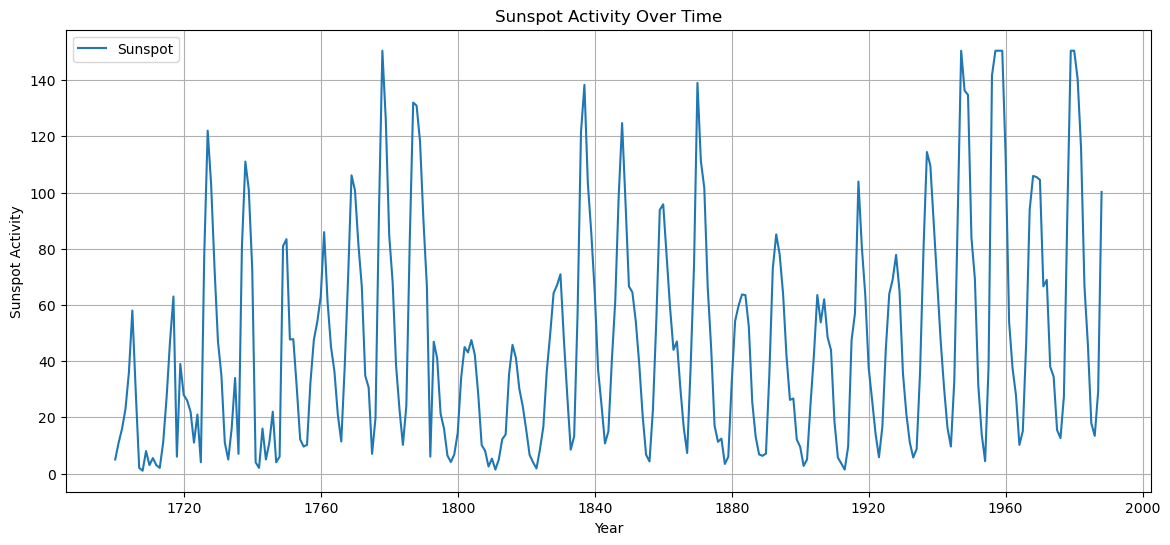

In [357]:
plt.figure(figsize=(14, 6))
plt.plot(sunspot.index, sunspot['sunspot'], label='Sunspot')
plt.xlabel("Year")
plt.ylabel("Sunspot Activity")
plt.title("Sunspot Activity Over Time")
plt.legend()
plt.grid()
plt.show()

Une autre approche est d'effectuer une transformation logarithmique pour vérifier un effet multiplicatif. Si la série devient plus linéaire après l'application d'un logarithme, cela suggère une relation multiplicative.

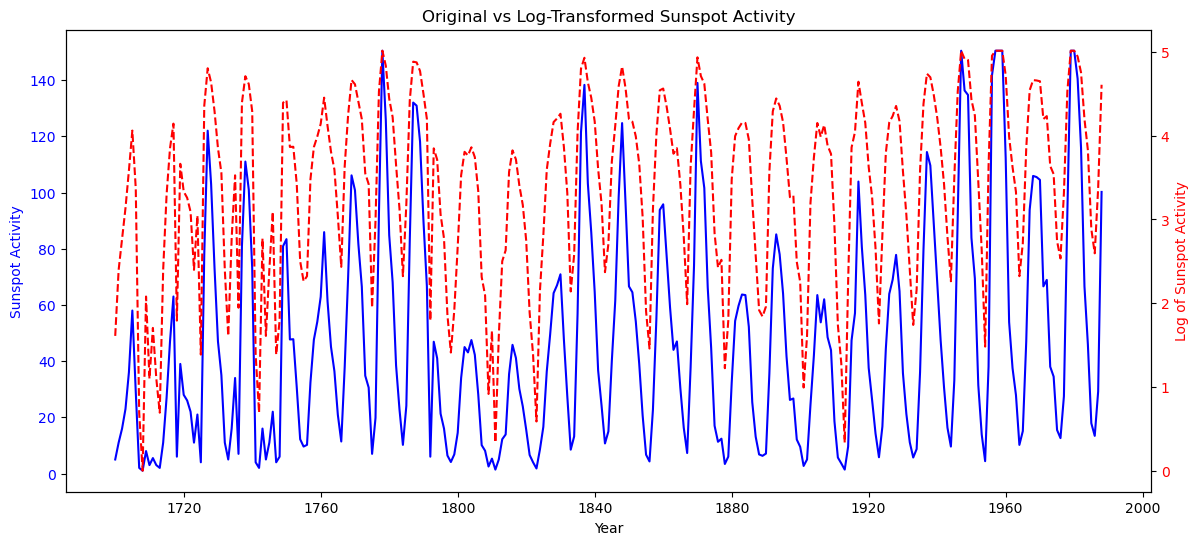

In [358]:
log_sunspot = np.log(sunspot) # Applique la transformation logarithmique sur les données des passagers

# Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot the original sunspot data on the first axis
ax1.plot(sunspot.index, sunspot['sunspot'], label='Original Sunspot', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Sunspot Activity', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the log-transformed data
ax2 = ax1.twinx()
ax2.plot(sunspot.index, log_sunspot, label='Log-Transformed Sunspot', color='red', linestyle='--')
ax2.set_ylabel('Log of Sunspot Activity', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title and show the plot
plt.title('Original vs Log-Transformed Sunspot Activity')
plt.show()

<div style="background-color: #28a745; color: white; padding: 15px; border-radius: 5px;">
<h3>Interpretation des résultats</h3>

- Dans le graphique de la série temporelle, on peut observer une période claire de 11 ans, avec des amplitudes inégales sur l'ensemble du signal, ce qui suggère que le signal est de nature multiplicative.
- En prenant le logarithme du signal, on remarque que les amplitudes des différentes périodes deviennent plus uniformes sur l'ensemble du signal, ce qui nous confirme que le signal est plutôt multiplicatif que additif.



Concernant la tendance, une façon de visualiser la tendance en lissant la courbe à l'aide
 des moyennes mobiles sur une fenêtre glissante d'observations en utilisant la fonction
 "rolling". Lorsqu'on choisit différentes tailles de fenêtres glissantes, on obtient les résultats
 suivants :

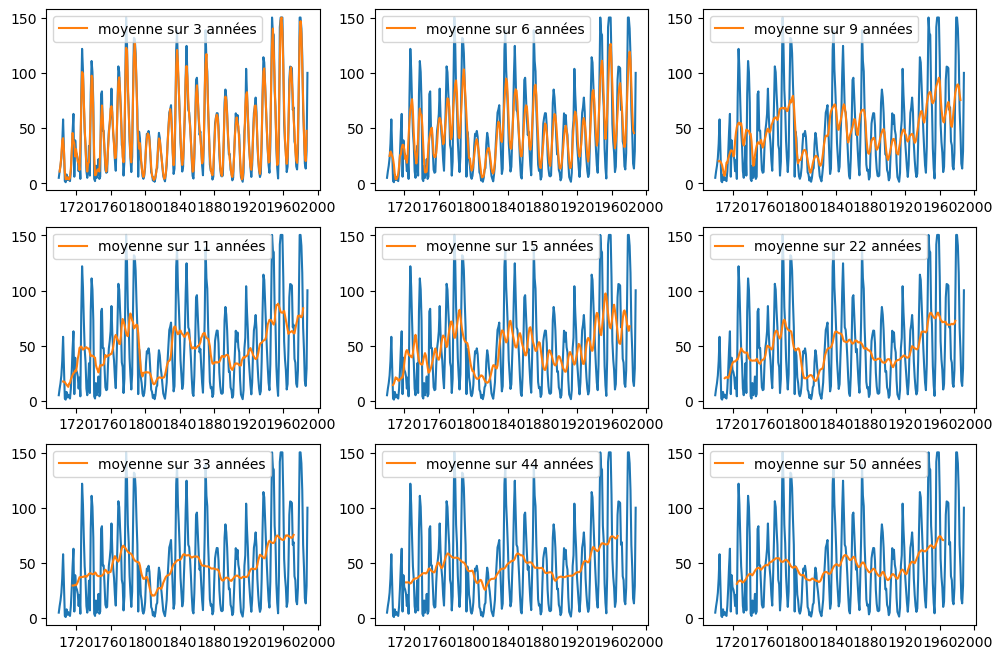

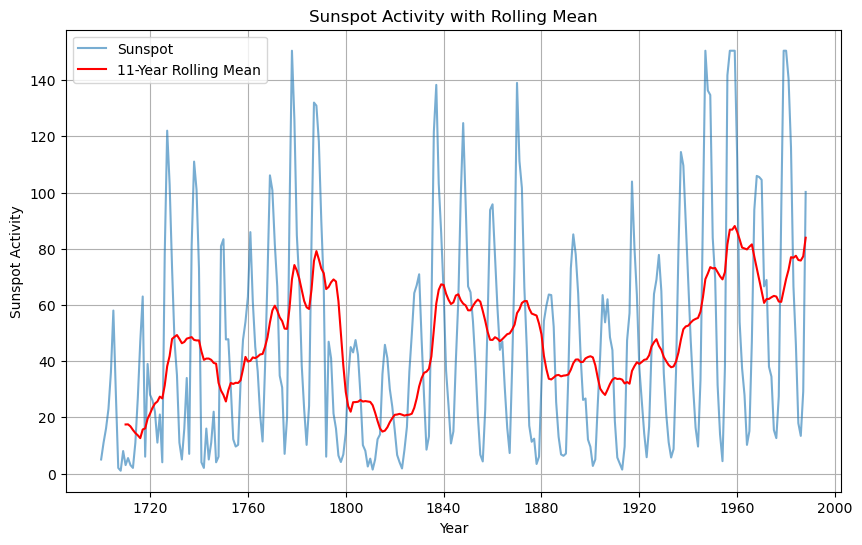

In [359]:
win = [3, 6, 9, 11, 15, 22, 33, 44, 50] # Liste des différentes fenêtres de moyennes mobiles en mois
fig = plt.figure(figsize=(12,8))  
for i in range(len(win)): # Boucle sur chaque fenêtre de la liste 'win'
    ax = fig.add_subplot(3, 3, i+1) # Crée un sous-graphe dans une grille 3x3, avec une position inde
    ax.plot(sunspot) # Trace la série logarithmique des passagers (y)
    ax.plot(sunspot.rolling(win[i], center=True).mean(), label=f"moyenne sur {win[i]} années")
    ax.legend()  

# Rolling statistics (e.g., moving average)
window_size = 11
sunspot['rolling_mean'] = sunspot['sunspot'].rolling(window=window_size).mean()

plt.figure(figsize=(10, 6))
plt.plot(sunspot.index, sunspot['sunspot'], label='Sunspot', alpha=0.6)
plt.plot(sunspot.index, sunspot['rolling_mean'], label=f'{window_size}-Year Rolling Mean', color='red')
plt.xlabel("Year")
plt.ylabel("Sunspot Activity")
plt.title("Sunspot Activity with Rolling Mean")
plt.legend()
plt.grid()
plt.show()


<div style="background-color: #28a745; color: white; padding: 15px; border-radius: 5px;">
<h3>Interpretation des résultats</h3>
 
 En prenant une fenêtre de 11, 22 ou 32 années, une tendance croissante est bien
 visible. Par ailleurs, le fait que cette tendance est identifiable pour des fenêtres glissantes
 dont la taille est un multiple de 11 mois suggère une notion de saisonnalité. .

Concernant la saisonnalité, elle désigne les tendances hebdomadaires, mensuelles,
 trimestrielles ou annuelles. Ce sont les motifs qui se répètent sur une durée infra-annuelle. Il
 semble qu'on ait ici une saisonnalité de 11 années. Une manière visuelle de vérifier l'effet
 saisonnier est de tracer une courbe pour chaque 11 années en prenant les années comme
 abscisses et visualiser ainsi la répartition des passagers au cours de chaque 11 ans.

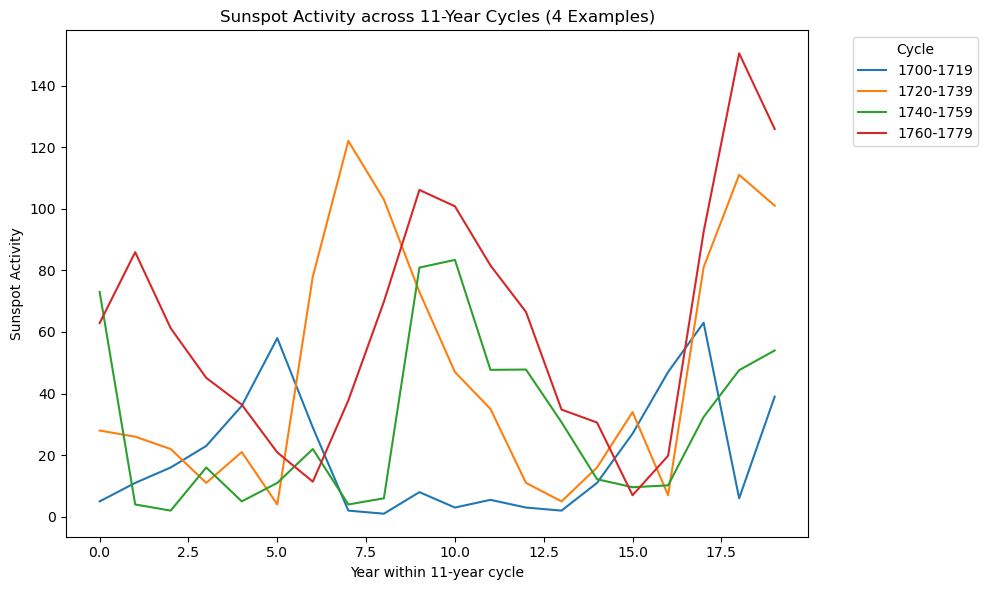

In [360]:
sunspot['year'] = sunspot.index.year

# Group data by 11-year periods
grouped = sunspot.groupby((sunspot['year'] - sunspot['year'].min()) // 20)

# Initialize the plot
plt.figure(figsize=(10, 6))

# Plot only the first 4 groups
for i, (_, group) in enumerate(grouped):
    if i >= 4:  # Limit to 4 groups
        break
    years = group['year'] - group['year'].min()  # Align years to start from 0
    plt.plot(years, group['sunspot'], label=f"{group['year'].iloc[0]}-{group['year'].iloc[-1]}")

# Add labels, legend, and title
plt.xlabel("Year within 11-year cycle")
plt.ylabel("Sunspot Activity")
plt.title("Sunspot Activity across 11-Year Cycles (4 Examples)")
plt.legend(title="Cycle", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<div style="background-color: #28a745; color: white; padding: 15px; border-radius: 5px;">
<h3>Interpretation des résultats</h3>

Les variations du nombre de passagers aériens sur 11 années sont plus ou moins similaires d'un cycle à un autre. C'est la saisonnalité.

C:\Users\medal\AppData\Local\Temp\ipykernel_23964\3329957138.py:6: UserWarning: The figure layout has changed to tight
  fig.tight_layout()  # Ajuste automatiquement la disposition des sous-graphiques pour éviter le chevauchement


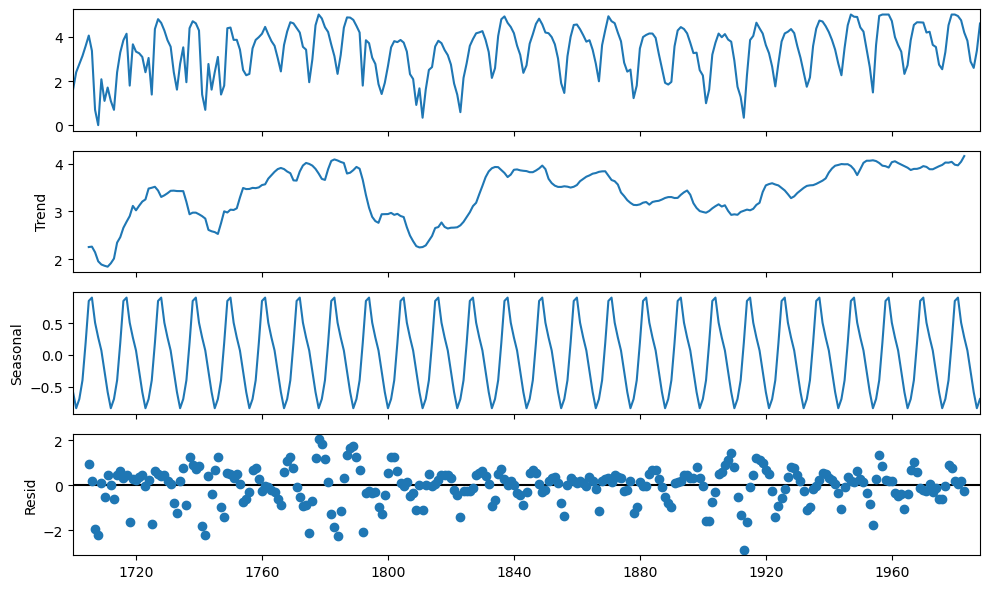

In [361]:
decomp = seasonal_decompose(log_sunspot, model='additive', period=11)  # Effectue une décomposition saisonnière additive de la série 'y'
# decomp = seasonal_decompose(x, model='multiplicative')  # Effectue une décomposition saisonnière additive de la série 'y'

fig = decomp.plot()  # Génère le graphique des composantes de la décomposition (tendance, saisonnalité, résiduel)
fig.set_size_inches((10, 6))  # Définit la taille de la figure
fig.tight_layout()  # Ajuste automatiquement la disposition des sous-graphiques pour éviter le chevauchement
plt.show()  


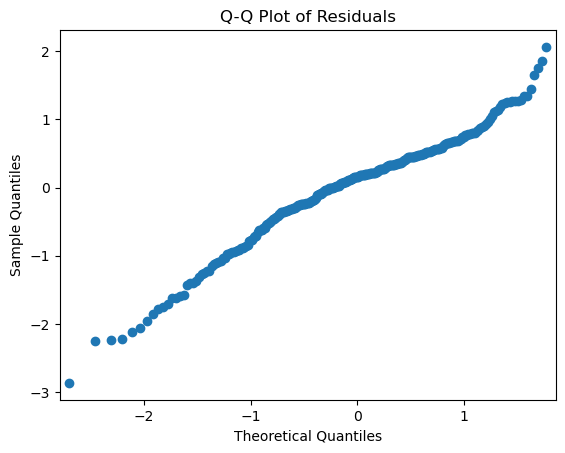

In [362]:
from statsmodels.api import qqplot

qqplot(decomp.resid, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()


<div style="background-color: #28a745; color: white; padding: 15px; border-radius: 5px;">
<h3>Interprétation des resultats</h3>

On arrive à bien voir les trois composantes du signal : la tendance, la saison et le signal stationnaire (le bruit). On s'est également assuré que le bruit est gaussien puisque la courbe du plot Q-Q est plus ou moins linéaire.

c:\projects\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


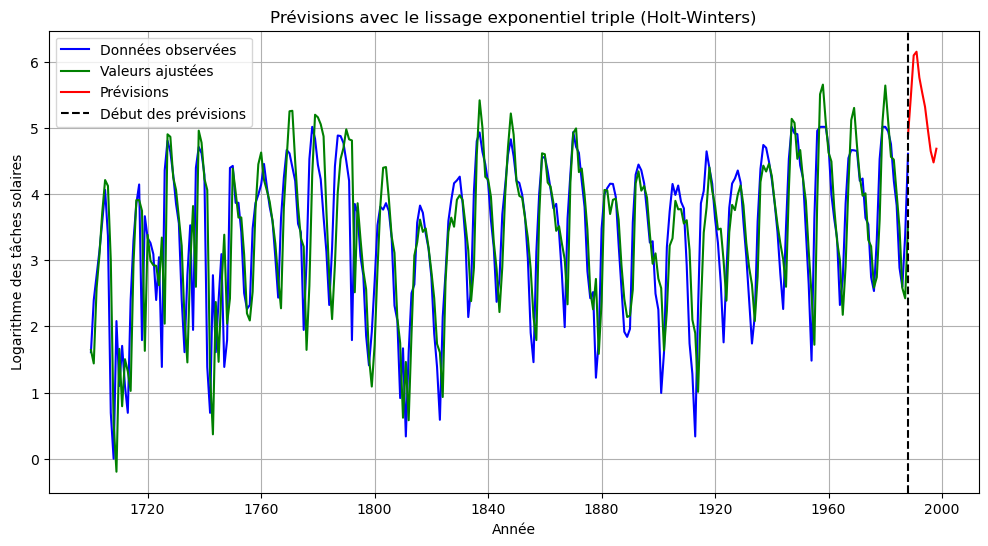

In [365]:
# Appliquer la méthode Holt-Winters sur la série logarithmique
model = ExponentialSmoothing(
    log_sunspot,  # Série logarithmique
    trend="add",  # Tendance additive (car linéaire localement)
    seasonal="add",  # Composante saisonnière additive
    seasonal_periods=11  # Périodicité détectée (11 ans)
)
hw_model = model.fit()

# Ajouter les prévisions pour les 20 prochaines années
forecast_period = 11
forecast = hw_model.forecast(steps=forecast_period)

# Visualiser les résultats
plt.figure(figsize=(12, 6))
plt.plot(log_sunspot.index, log_sunspot, label="Données observées", color="blue")
plt.plot(log_sunspot.index, hw_model.fittedvalues, label="Valeurs ajustées", color="green")
plt.plot(
    pd.date_range(log_sunspot.index[-1], periods=forecast_period, freq="AS"),
    forecast,
    label="Prévisions",
    color="red",
)

# Ajouter une ligne verticale pour marquer le début des prévisions
plt.axvline(x=log_sunspot.index[-1], color='black', linestyle='--', label='Début des prévisions')

# Titre et légende
plt.title("Prévisions avec le lissage exponentiel triple (Holt-Winters)")
plt.xlabel("Année")
plt.ylabel("Logarithme des tâches solaires")
plt.legend()
plt.grid()
plt.show()


<div style="background-color: #28a745; color: white; padding: 15px; border-radius: 5px;">
<h3>Interpretation of results</h3>

On arrive à décomposer notre signal temporel en ses trois composantes. De plus, on arrive à correctement prédire la prochaine période de sunspot avec du lissage exponentiel triple (méthode Holt-Winters) appliqué sur la série logarithmique.

On s'intéresse maintenant aux prédictions avec des modèles AR, MA, ARMA, ARIMA ou encore SARIMA

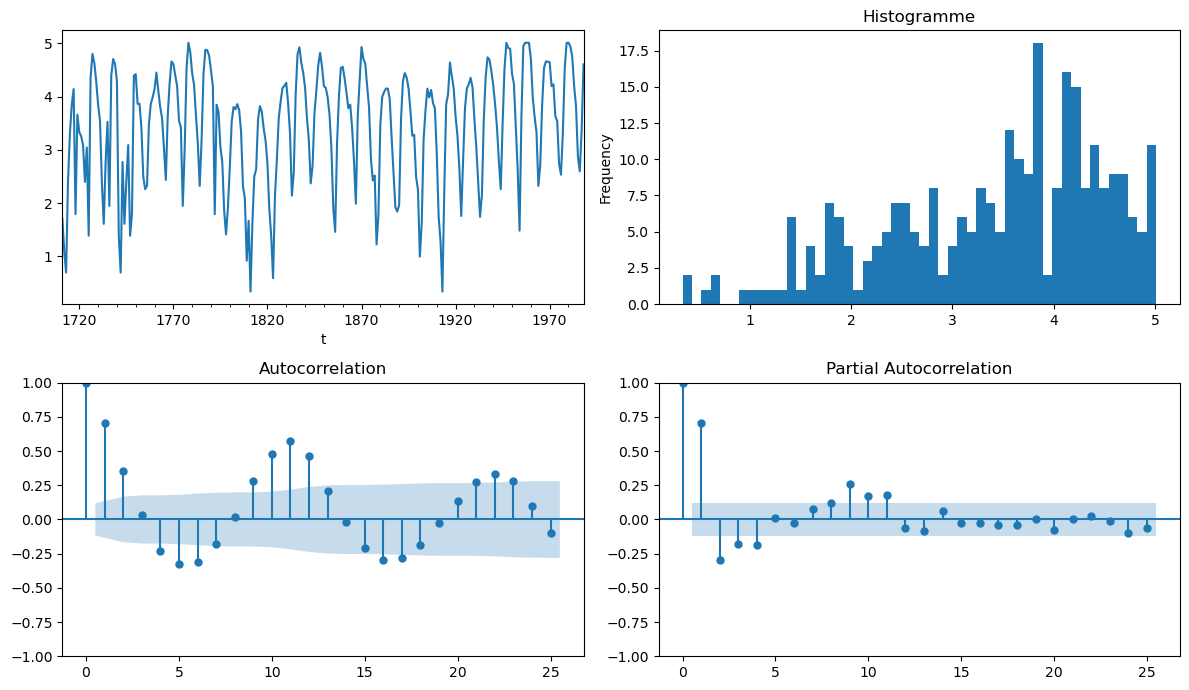

In [69]:
fct.ts_plot(log_sunspot[11:].sunspot, fig_size=(12,7)) # Trace la série temporelle de la première dif


<div style="background-color: #28a745; color: white; padding: 15px; border-radius: 5px;">
<h3>Interpretation des résultats</h3>

Dans le graphique d'autocorrélation (ACF), on observe des pics significatifs à plusieurs décalages, notamment autour de 11 ans, ce qui confirme la périodicité visible dans la série temporelle.

Tant dans le graphique ACF que dans le graphique PACF, on ne constate pas de décroissance marquée, ce qui indique la présence d'une saisonnalité (et d'une tendance qu'il faut éliminer).

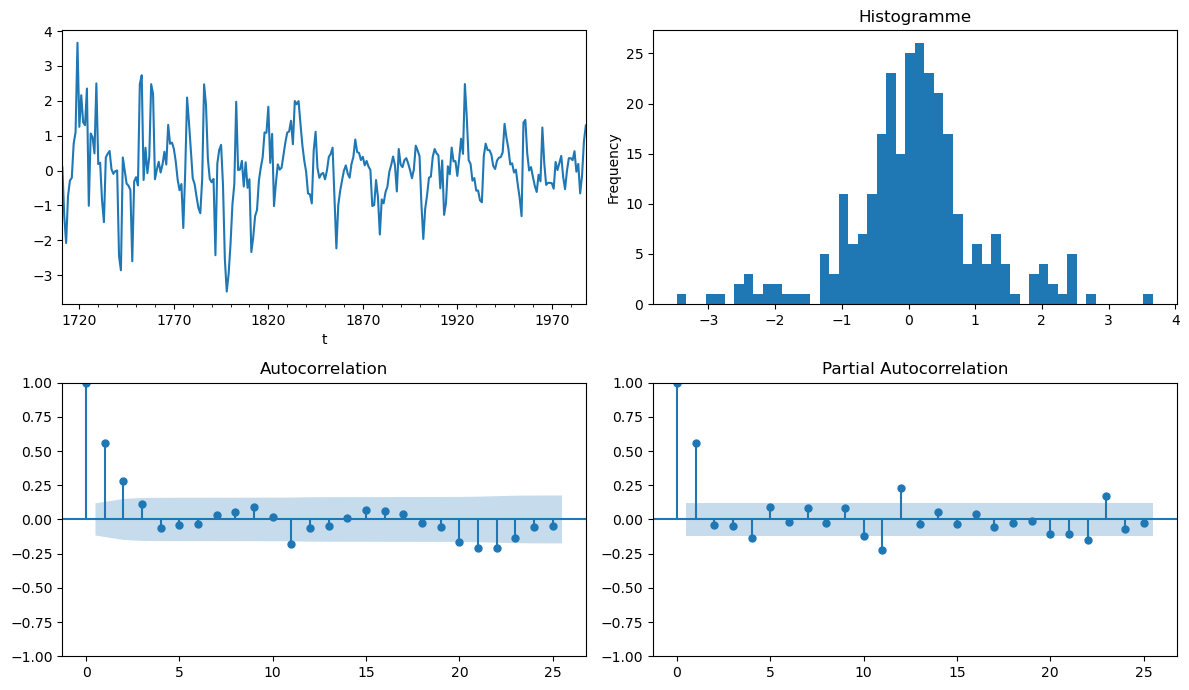

In [70]:
y_diff_11 = log_sunspot- log_sunspot.shift(11) # La différence saisonnière sur 12 mois en soustrayant la valeur d'il y a

fct.ts_plot(y_diff_11[11:].sunspot, fig_size=(12,7)) # Trace la série temporelle de la première dif


<div style="background-color: #28a745; color: white; padding: 15px; border-radius: 5px;">
<h3>Interpretation des résultats</h3>

Après avoir éliminé la saisonnalité, on remarque que la décroissance des graphiques ACF et PACF est beaucoup plus marquée qu'auparavant. Toutefois, on n'observe pas d'annulation directe des valeurs pour les deux graphiques. Nous allons donc supprimer la tendance dans la prochaine étape.



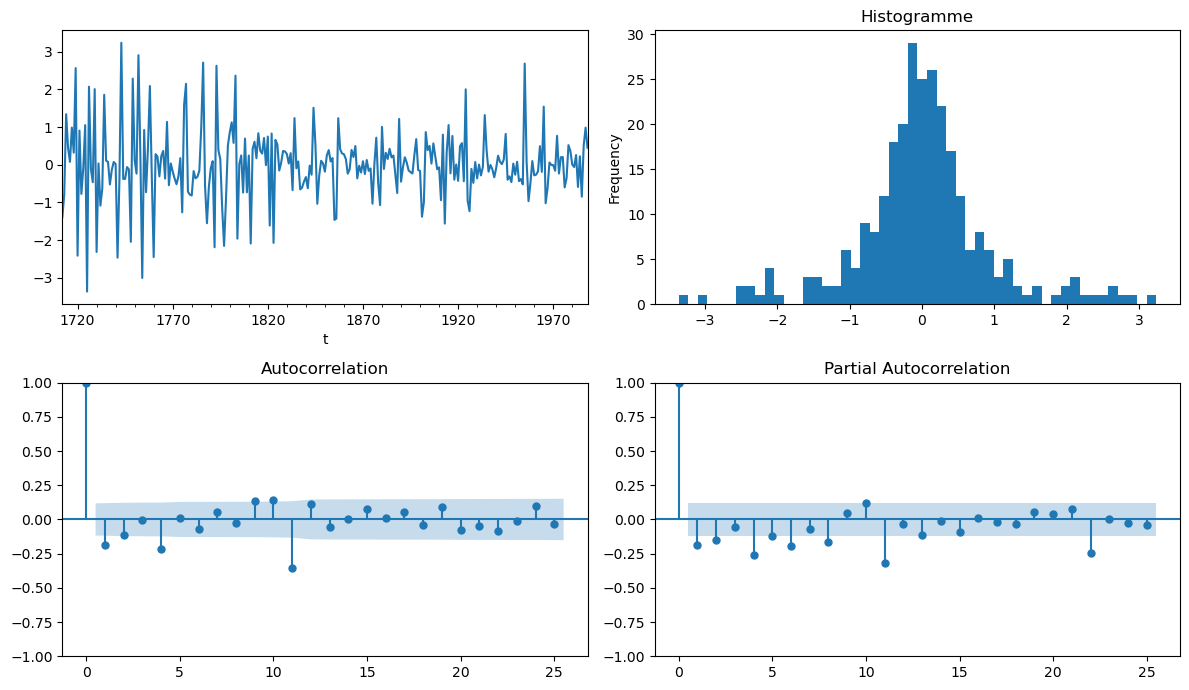

In [71]:
y_diff_11_1 = y_diff_11- y_diff_11.shift(1) # Calcule la première différence de la série saisonnière
# en soustrayant la valeur précédente
# fct.plot_acf_pacf(y_diff_11_1[12:], fig_size=(9,5)) # Trace les fonctions d'autocorrélation (ACF),
# en excluant les 13 premières valeurs
fct.ts_plot(y_diff_11_1[12:].sunspot, fig_size=(12,7)) # Trace la série temporelle de la première dif


<div style="background-color: #28a745; color: white; padding: 15px; border-radius: 5px;">
<h3>Interpretation des résultats</h3>

On remarque qu'après avoir supprimé la saisonnalité et la tendance, on obtient un signal stationnaire (bruit) avec un histogramme en forme de cloche. Les graphiques ACF et PACF montrent une décroissance rapide, et les valeurs atteignent rapidement les environs de zéro.



In [ ]:

x_train, x_test = split_by_year(sunspot, log_sunspot, 1972)


273
16


<div style="background-color: #28a745; color: white; padding: 15px; border-radius: 5px;">
<h3>Commentaire sur la fonction `split_by_year`</h3>

- La fonction `split_by_year` permet de diviser les jeux de données des taches solaires (`sunspot` et `log_sunspot`) en ensembles d'entraînement et de test selon l'année spécifiée, `split_year`. Les données d'entraînement couvrent les années jusqu'à `split_year`, tandis que les données de test commencent l'année suivante. 

- J'ai choisi l'année 1972 comme point de séparation afin de pouvoir prédire la dernière période du signal, c'est-à-dire les 11 dernières années.


In [ ]:
import itertools
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the range for parameters
p = q = range(0, 4)  # Range for p and q
P = Q = range(0, 3)  # Range for seasonal P and Q
d = range(0, 3)      # Range for non-seasonal differencing (d)
D = range(0, 3)      # Range for seasonal differencing (D)
seasonal_period = 11  # Seasonal period (adjust based on data)

# Generate all combinations of parameters
pdq = list(itertools.product(p, d, q))  # Non-seasonal differencing (d is included)
seasonal_pdq = [(x[0], X, x[1], seasonal_period) for X in D for x in itertools.product(P, Q)]  # Loop for seasonal differencing (D)

# List to store results
results = []

# Iterate over all combinations of parameters
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            # Fit SARIMAX model
            model = SARIMAX(x_train.values,
                            order=param,
                            seasonal_order=seasonal_param)
            result = model.fit(disp=False)
            
            # Append results
            results.append({
                'Order': param,
                'Seasonal_Order': seasonal_param,
                'AIC': result.aic
            })
        except Exception as e:
            # Skip invalid parameter combinations
            continue

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Sort by AIC to find the best model
best_model = results_df.loc[results_df['AIC'].idxmin()]
print("Best Model:")
print(best_model)

# Display all results sorted by AIC
print("\nAll Results (sorted by AIC):")
print(results_df.sort_values('AIC').head(10))  # Display top 10 models


On obtient les résultats suivants :  
Best Model:  
Order                 (1, 0, 1)  
Seasonal_Order    (2, 2, 2, 11)  
AIC                        14.0  
Name: 377, dtype: object  

All Results (sorted by AIC):  
         Order Seasonal_Order         AIC  
377  (1, 0, 1)  (2, 2, 2, 11)   14.000000  
94   (0, 0, 3)  (1, 1, 1, 11)  580.944674  
92   (0, 0, 3)  (0, 1, 2, 11)  581.242264  
95   (0, 0, 3)  (1, 1, 2, 11)  582.769466  
97   (0, 0, 3)  (2, 1, 1, 11)  582.786956  
98   (0, 0, 3)  (2, 1, 2, 11)  582.813787  
418  (1, 0, 3)  (1, 1, 1, 11)  582.943224  
416  (1, 0, 3)  (0, 1, 2, 11)  583.242260  
419  (1, 0, 3)  (1, 1, 2, 11)  584.769440  
421  (1, 0, 3)  (2, 1, 1, 11)  584.786936


<div style="background-color: #28a745; color: white; padding: 15px; border-radius: 5px;">
<h3>Tuning des hyperparamètres du modèle SARIMAX</h3>

Dans cette cellule, nous avons utilisé une approche de recherche sur grille pour ajuster les hyperparamètres du modèle SARIMAX. Les paramètres ajustés incluent :
- **p**, **d**, **q** : Les ordres de l'autoregression (AR), de la différenciation (I) et de la moyenne mobile (MA) pour la composante non saisonnière du modèle.
- **P**, **D**, **Q** : Les ordres saisonniers correspondants pour la composante AR, I et MA saisonnière.
- **période saisonnière** : La période de la saisonnalité, ici fixée à 11.


Les valeurs de **p** et **q** ont été fixées selon les résultats des plots ACF (Autocorrelation Function) et PACF (Partial Autocorrelation Function). En effet, il est possible de trouver empiriquement un ordre de grandeur maximum pour les parties autorégressive et moyenne mobile, c'est-à-dire pour les valeurs **pmax** et **qmax** d'un modèle ARMA(p, q). La détermination des bornes supérieures concernant l'ordre de la partie AR et de la partie MA passe par l'étude des autocorrélations et des autocorrélations partielles. En effet, si la série stationnaire suit un modèle ARMA(p, q), alors :
- l'autocorrélation ACF devient presque nulle à partir du rang **q+1**,
- l'autocorrélation partielle PACF devient presque nulle à partir du rang **p+1**.

Nous avons pris des valeurs de **d** et **D** entre 0 et 2 pour avoir plus de liberté dans l'ajustement du modèle, permettant ainsi de tester différentes combinaisons de différenciations saisonnières et non saisonnières.

Nous avons généré toutes les combinaisons possibles de ces paramètres et ajusté un modèle SARIMAX pour chaque combinaison. Ensuite, nous avons sélectionné le meilleur modèle en fonction du critère d'information d'Akaike (AIC), qui pénalise les modèles plus complexes pour éviter le sur-apprentissage (overfitting).

Cependant, bien que le modèle avec le plus faible AIC=14 ait été sélectionné comme étant le meilleur, il n'a pas bien performé sur les données. En effet, on voit bien qu'il y a eu overfitting puisque les autres modèles ont un AIC aux alentours de 500 alors que celui-là a un AIC de 14 ! 

Le deuxième meilleur modèle avec un AIC plus élevé a montré de meilleures performances en termes de précision. Cela suggère que la complexité du modèle et l'overfitting peuvent affecter les résultats, et que le simple ajustement des hyperparamètres ne garantit pas toujours le meilleur modèle pour la prédiction.


# Projet : Temporal Data Analysis

## À propos
Ce document décrit les étapes essentielles à suivre pour mener à bien votre projet. Considérez-le comme un guide si vous ne savez pas par où commencer ou si vous vous perdez en cours de route. Quelques conseils sont également fournis pour vous aider à bien démarrer et à structurer votre travail.

---

## Charger et explorer les données
Commencez par charger la base de données `sunspot.csv` avec pandas et explorez-en le contenu.  
**NB** : la série "sunspot" recense le nombre annuel de tâches solaires de 1700 à 1988.

Cette étape est cruciale. Assurez-vous de bien comprendre vos données avant d'aller plus loin.

---

## Nettoyage et analyse des données (statistique descriptive)
Quelques pistes qui pourraient être utiles :

- Organiser les données en un DataFrame indexé par le temps.
- Tester les opérations possibles sur les séries temporelles.
- Visualiser la série pour détecter d'éventuelles données manquantes ou valeurs aberrantes.  
  Si tel est le cas, comment résoudre ces problèmes ?

---

## Partie fondamentale (statistique inférentielle)
Il est temps de s'attaquer à la décomposition, modélisation et prédiction des séries temporelles via des modèles statistiques classiques. Points à examiner :

- Le modèle doit-il être additif ou multiplicatif ?
- Quel modèle est le plus approprié (AR, MA, ARMA, ARIMA, SARIMA, ...) ?
- Peut-on décomposer la série en composants indépendants ?  
  Lesquels sont les plus pertinents ?
- Comment ajuster le modèle choisi pour la partie d'apprentissage ?
- Quelle méthode utiliser pour prédire une partie de la série ?  
  Trouver des intervalles de confiance ?  
  Comment évaluer la qualité des prédictions ?
- Y a-t-il des tendances et des composantes saisonnières à éliminer dans la série ?  
  Si oui, la série restante est-elle valide ?  
  Utilisez

  ---

## Objectifs finaux

1. Identifier le type de problème, l'entrée et la sortie attendues du modèle.
2. Explorer et comprendre vos données.
3. Choisir des méthodes d'évaluation pertinentes.
4. Sélectionner un modèle adapté et comprendre son fonctionnement global ainsi que son mécanisme d'apprentissage.

---

## Conseils pour une bonne maîtrise

- Ne brûlez pas les étapes : comprenez bien chaque partie avant de passer à la suivante, et prenez le temps d'explorer vos données.
- Identifiez clairement la catégorie de votre problème.
- **Au final, qu'est-ce qui est attendu ?**  
  Veuillez déposer un seul document sur Moodle au format PDF **avant le 22 décembre 2024 minuit** contenant :
  - Les figures, tableaux, etc.
  - Une brève description et discussion de chaque résultat.
  - Une synthèse finale.  

**NB** : Ce n'est **pas la quantité/le nombre de pages** qui compte pour la note du projet.








# Projet : Temporal Data Analysis


## À propos

- **Auteur** : Mohammed Ali EL ADLOUNI  
- **Master** : Master M2 MALIA 
- **Date** : 23/12/2024  

Ce projet a pour objectif d'explorer et de modéliser une série temporelle de tâches solaires (sunspot) sur la période de 1700 à 1988. La tâche consiste à charger, analyser, nettoyer les données et appliquer des méthodes statistiques descriptives et inférentielles pour prédire les valeurs futures de cette série. Les méthodes utilisées incluent la décomposition, la modélisation  SARIMA, avec des étapes essentielles d'évaluation et de validation des prédictions. 


## Nettoyage et analyse des données (statistique descriptive)


On importe les librairies nécessaires pour la suite

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib notebook
%matplotlib inline
import fonctions as fct
from statsmodels.tsa.seasonal import seasonal_decompose, STL  # Importe les fonctions pour la décomposition saisonnière
from statsmodels.tsa.api import ExponentialSmoothing  # Importe le modèle de lissage exponentiel



Tout d'abord, on commence par lire les données temporelles qui sont gardées au format CSV

In [ ]:
sunspot = pd.read_csv("sunspot.csv", index_col="t")


On commence directement la phase exploration des données. Cela est important car ça va nous permettre de comprendre nos données et de pouvoir les modéliser et analyser correctement par la suite !

In [ ]:
print(f"sunspot dataset shape : {sunspot.shape}\n")

print(sunspot.info())

sunspot dataset shape : (289, 1)

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 1700 to 1988
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sunspot  286 non-null    float64
dtypes: float64(1)
memory usage: 4.5 KB
None


<div style="background-color: #28a745; color: white; padding: 15px; border-radius: 5px;">
<h3>Interprétation des résultats</h3>

- **Dimensions** : (289, 1)  
  Le dataset contient 289 lignes et 1 colonne.  
- **Index** : Va de l'année 1700 à 1988.  
- **Informations sur les colonnes** :  
  - `sunspot` : Contient les données sur le nombre de tâches solaires.  
  - Valeurs nulles : 3 sur 289 entrées sont nulles.  
  - Type de données : `float64`.  
</div>


In [ ]:
sunspot.describe()

sunspot
count  286.000000
mean    47.801748
std     40.046048
min      1.000000
25%     13.900000
50%     37.700000
75%     68.700000
max    190.200000

In [ ]:
print(sunspot.head(5))


      sunspot
t            
1700      5.0
1701     11.0
1702     16.0
1703     23.0
1704     36.0


In [ ]:
print(sunspot.tail(5))


      sunspot
t            
1984     45.9
1985     17.9
1986     13.4
1987     29.2
1988    100.2


<div style="background-color: #28a745; color: white; padding: 15px; border-radius: 5px;">
<h3>Interprétation des résultats</h3>

- **Résumé statistique (`sunspot.describe()`) :**  
  - Count : 286 valeurs non nulles.  
  - Mean : La moyenne des tâches solaires est d'environ 47,80.  
  - Std : L'écart type est de 40,05, indiquant une variabilité dans les nombres de tâches solaires.  
  - Min : La valeur minimale enregistrée est 1,0.  
  - 25e centile : 13,9 (25 % des valeurs sont inférieures à cette valeur).  
  - Médiane (50e centile) : 37,7.  
  - 75e centile : 68,7 (75 % des valeurs sont inférieures à cette valeur).  
  - Max : La valeur maximale enregistrée est 190,2.  
</div>


On s'assure que l'index est traité comme une série temporelle (années)

In [ ]:
# Ensure the index is treated as a time series (years)
sunspot.index = pd.to_datetime(sunspot.index, format='%Y')


In [ ]:
sunspot.head()

sunspot
t                  
1700-01-01      5.0
1701-01-01     11.0
1702-01-01     16.0
1703-01-01     23.0
1704-01-01     36.0

Maintenant, nous allons tracer la colonne des tâches solaires en fonction du temps (années) entre 1700 et 1988.

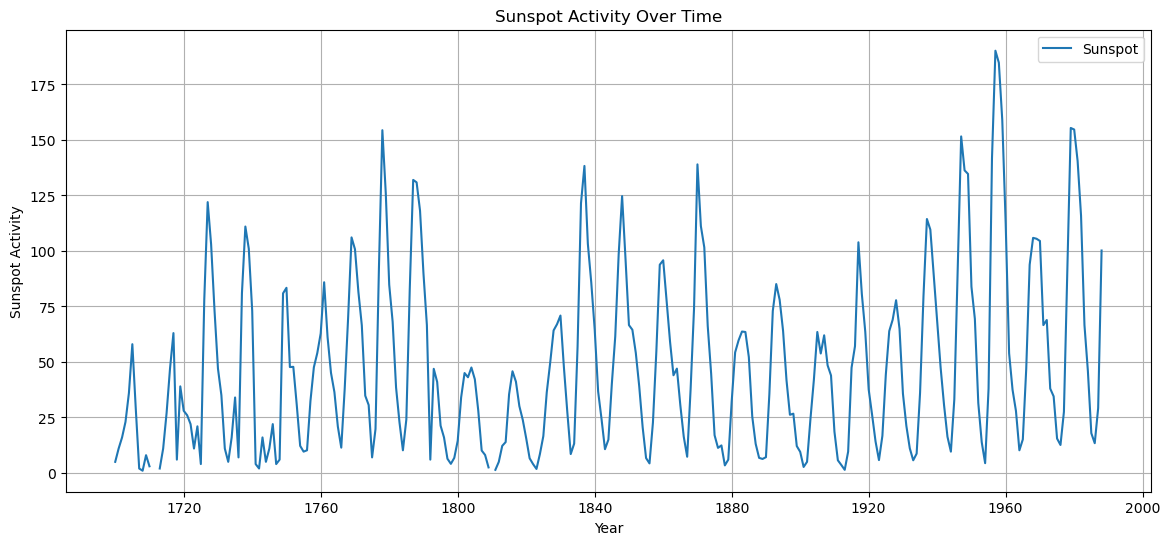

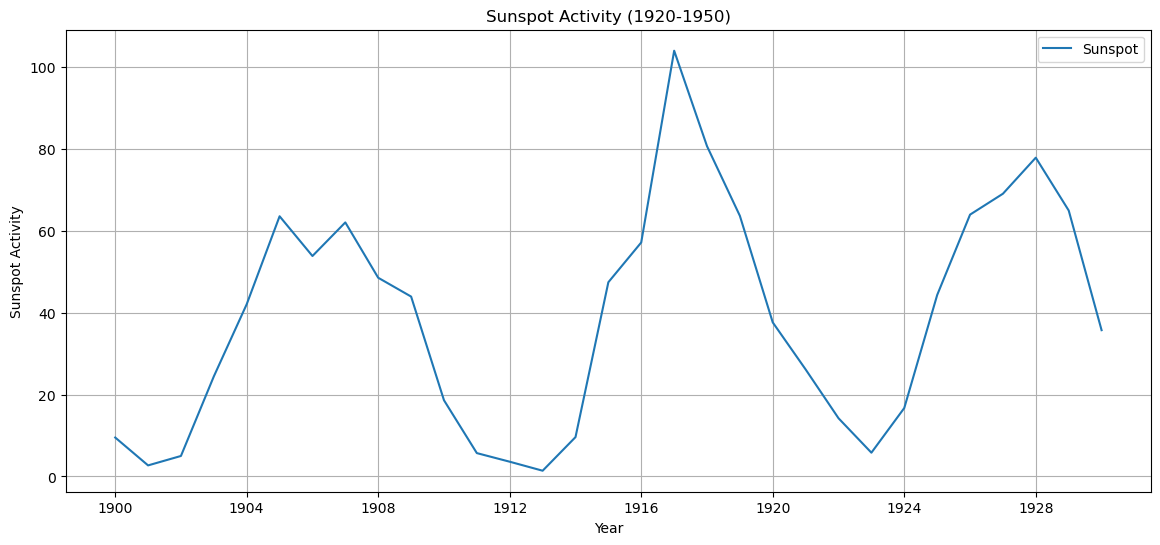

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(sunspot.index, sunspot['sunspot'], label='Sunspot')
plt.xlabel("Year")
plt.ylabel("Sunspot Activity")
plt.title("Sunspot Activity Over Time")
plt.legend()
plt.grid()
plt.show()

filtered_sunspot = sunspot[(sunspot.index >= "1900-01-01") & (sunspot.index <= "1930-12-31")]
# Plot the filtered data
plt.figure(figsize=(14, 6))
plt.plot(filtered_sunspot.index, filtered_sunspot['sunspot'], label='Sunspot')
plt.xlabel("Year")
plt.ylabel("Sunspot Activity")
plt.title("Sunspot Activity (1920-1950)")
plt.legend()
plt.grid()
plt.show()


<div style="background-color: #28a745; color: white; padding: 15px; border-radius: 5px;">
<h3>Interprétation du graphique</h3>

- **Saisonnalité** : On observe une cyclicité claire avec des pics et des creux récurrents. Les cycles semblent se répéter environ tous les 11 ans, ce qui correspond au cycle solaire.

- **Variabilité** : L'amplitude des cycles varie. Certains cycles présentent des pics très élevés (par exemple, autour de 1780, 1860 et 1960), tandis que d'autres (notamment autour de 1810) montrent une période de faible activité des tâches solaires.
</div>


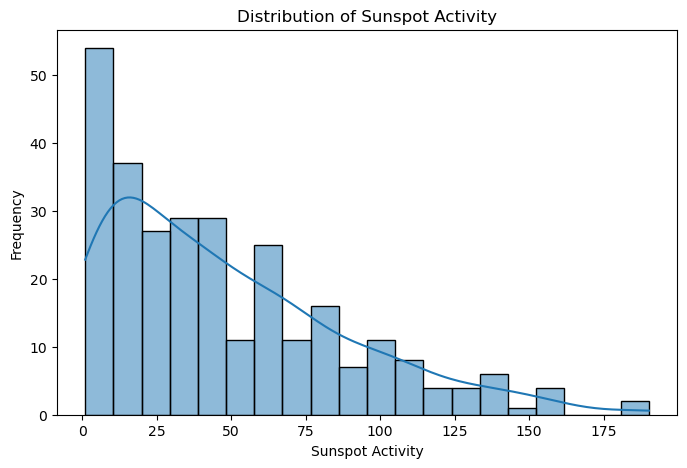

In [ ]:
# Distribution plot
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(sunspot['sunspot'].dropna(), kde=True, bins=20)
plt.xlabel("Sunspot Activity")
plt.ylabel("Frequency")
plt.title("Distribution of Sunspot Activity")
plt.show()


<div style="background-color: #28a745; color: white; padding: 15px; border-radius: 5px;">
<h3>Interprétation du graphique</h3>

- La majorité des observations se concentrent entre 0 et 50, indiquant que les niveaux d'activité des tâches solaires sont généralement faibles.

- On observe une diminution notable de la fréquence au-delà de 50, avec des pics occasionnels jusqu'à environ 175.
</div>


On s"intéresse maintenant aux 3 valeurs manquantes (NaN) relevées au début de notre analyse descriptive. Puisuqe on a que 3 valeurs manquantes, on va utiliser l'interpolation qui va nous permettre rapidement et facilement de remplir ces valeurs manquantes. Les valeurs manquantes vont donc être calculées selon la relation suivante:

$$
y_i = y_{i-1} + \frac{(x_i - x_{i-1})}{(x_{i+1} - x_{i-1})} \times (y_{i+1} - y_{i-1})
$$


Cette ligne ci-dessous remplace les valeurs manquantes (NaN) dans la colonne sunspot par la moyenne des 3 valeurs voisines, calculée à l'aide d'une fenêtre glissante. La moyenne est calculée même si la fenêtre contient moins de 3 valeurs grâce à min_periods=1.

In [ ]:
sunspot['sunspot'] = sunspot['sunspot'].fillna(sunspot['sunspot'].rolling(window=3, min_periods=1).mean())

print("Number of NaN values after interpolation:", sunspot['sunspot'].isna().sum())


Number of NaN values after interpolation: 0


Maintenant, nous allons vérifier s'il existe des valeurs aberrantes, puis nous examinerons comment les traiter correctement !








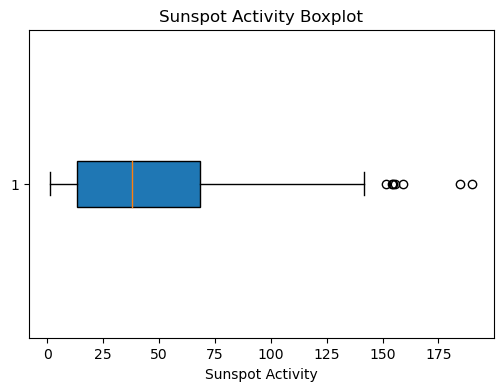

In [ ]:
# Boxplot to check for outliers
plt.figure(figsize=(6, 4))
plt.boxplot(sunspot['sunspot'].dropna(), vert=False, patch_artist=True)
plt.xlabel("Sunspot Activity")
plt.title("Sunspot Activity Boxplot")
plt.show()


In [ ]:
# Calculate Q1 and Q3
Q1 = sunspot['sunspot'].quantile(0.25)
Q3 = sunspot['sunspot'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = sunspot[(sunspot['sunspot'] < lower_bound) | (sunspot['sunspot'] > upper_bound)]

# Count outliers
num_outliers = outliers.shape[0]

print(f"Number of outliers: {num_outliers}")

# Display outliers
print(outliers)

Number of outliers: 7
            sunspot
t                  
1778-01-01    154.4
1947-01-01    151.6
1957-01-01    190.2
1958-01-01    184.8
1959-01-01    159.0
1979-01-01    155.4
1980-01-01    154.7


In [ ]:
# Cap or clip outliers to the nearest threshold
sunspot['sunspot'] = sunspot['sunspot'].apply(
    lambda x: max(lower_bound, min(upper_bound, x))
)


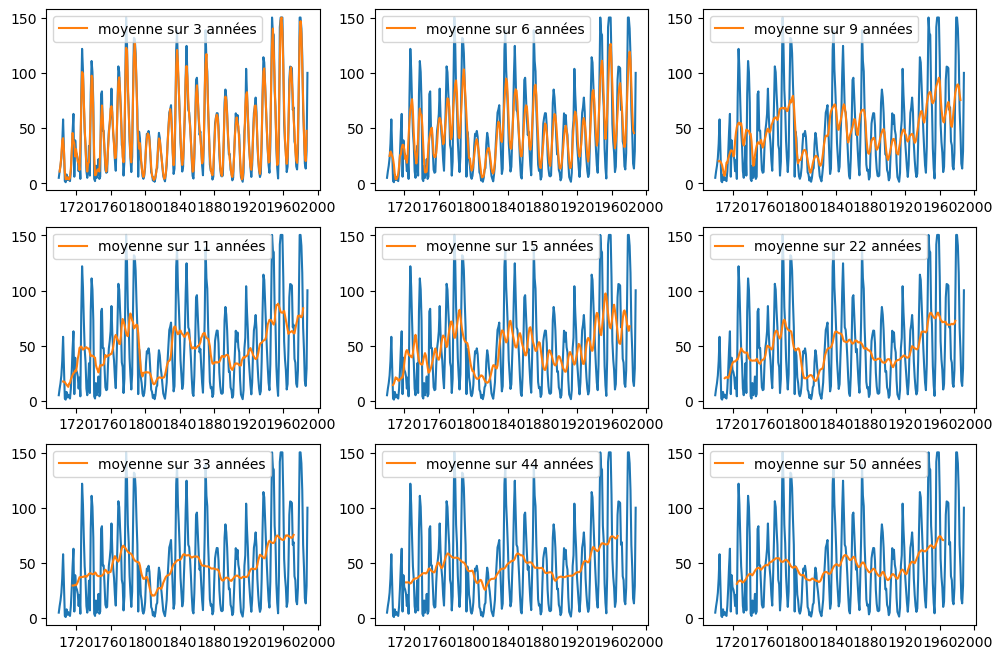

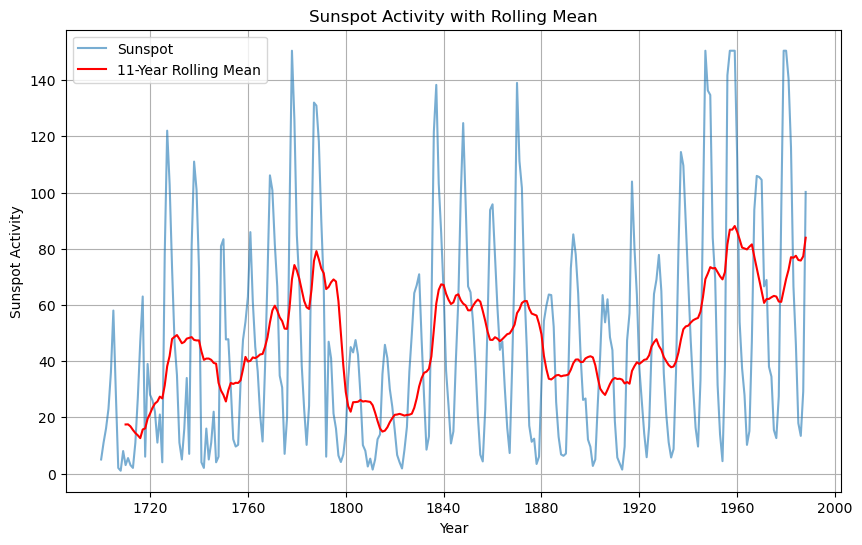

In [ ]:
win = [3, 6, 9, 11, 15, 22, 33, 44, 50] # Liste des différentes fenêtres de moyennes mobiles en mois
fig = plt.figure(figsize=(12,8))  
for i in range(len(win)): # Boucle sur chaque fenêtre de la liste 'win'
    ax = fig.add_subplot(3, 3, i+1) # Crée un sous-graphe dans une grille 3x3, avec une position inde
    ax.plot(sunspot) # Trace la série logarithmique des passagers (y)
    ax.plot(sunspot.rolling(win[i], center=True).mean(), label=f"moyenne sur {win[i]} années")
    ax.legend()  

# Rolling statistics (e.g., moving average)
window_size = 11
sunspot['rolling_mean'] = sunspot['sunspot'].rolling(window=window_size).mean()

plt.figure(figsize=(10, 6))
plt.plot(sunspot.index, sunspot['sunspot'], label='Sunspot', alpha=0.6)
plt.plot(sunspot.index, sunspot['rolling_mean'], label=f'{window_size}-Year Rolling Mean', color='red')
plt.xlabel("Year")
plt.ylabel("Sunspot Activity")
plt.title("Sunspot Activity with Rolling Mean")
plt.legend()
plt.grid()
plt.show()


In [ ]:
sunspot = sunspot.dropna()
print("\nAprès suppression :")
print(f"sunspot dataset shape : {sunspot.shape}")


Après suppression :
sunspot dataset shape : (280, 2)


In [ ]:
# # Ajouter une colonne "Year" (temps t)
# sunspot['Year'] = pd.date_range(start='1700', periods=len(sunspot), freq='Y')
# sunspot.set_index('Year', inplace=True)
# print("\nDataset indexé par le temps :")
# print(sunspot)


<Axes: xlabel='t'>

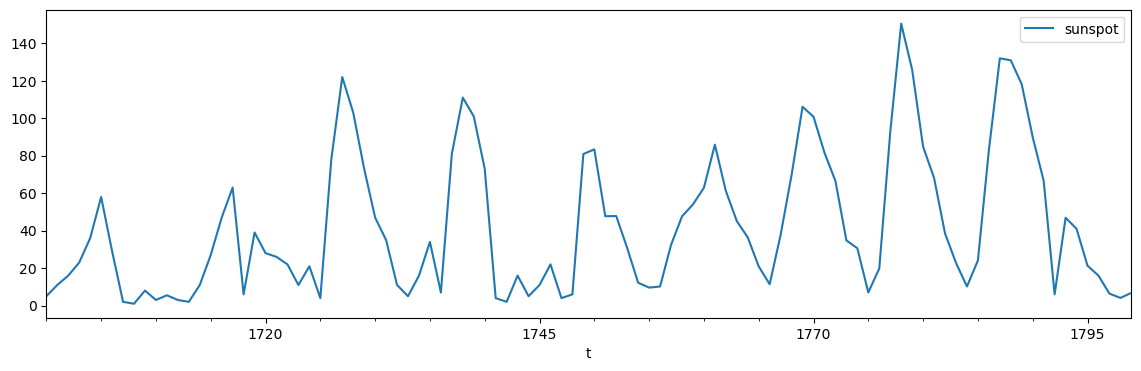

In [ ]:
sunspot_filtered = sunspot[sunspot.index.year < 1800]
sunspot_filtered.plot(y="sunspot", figsize=(14,4))


<Axes: xlabel='t'>

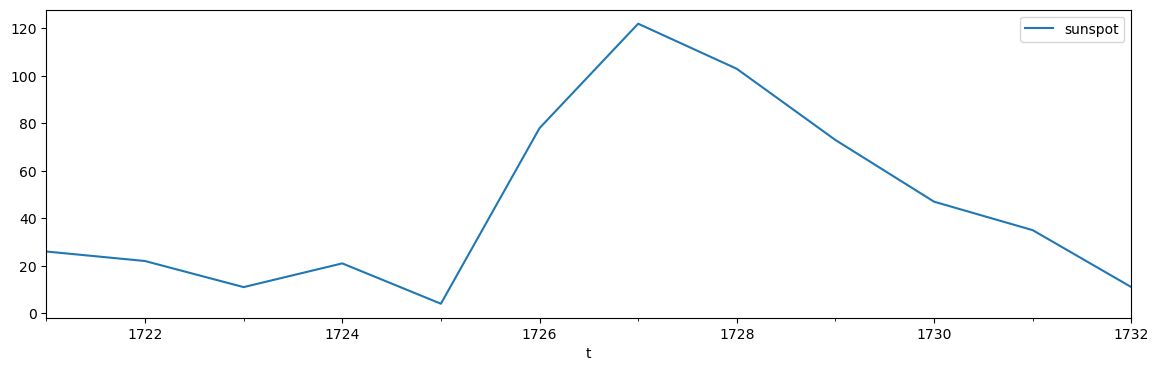

In [ ]:
sunspot_filtered = sunspot[(sunspot.index.year < 1733) & (sunspot.index.year > 1720)]
sunspot_filtered.plot(y="sunspot", figsize=(14,4))


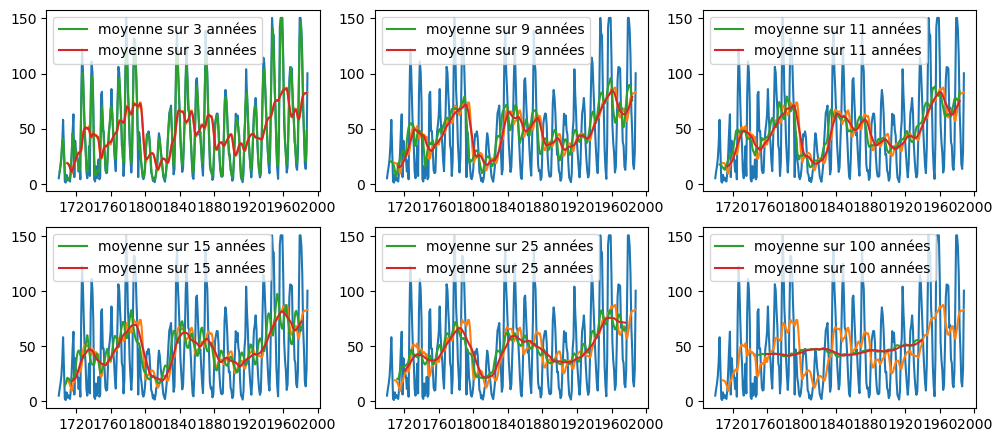

C:\Users\medal\AppData\Local\Temp\ipykernel_23964\3329957138.py:6: UserWarning: The figure layout has changed to tight
  fig.tight_layout()  # Ajuste automatiquement la disposition des sous-graphiques pour éviter le chevauchement


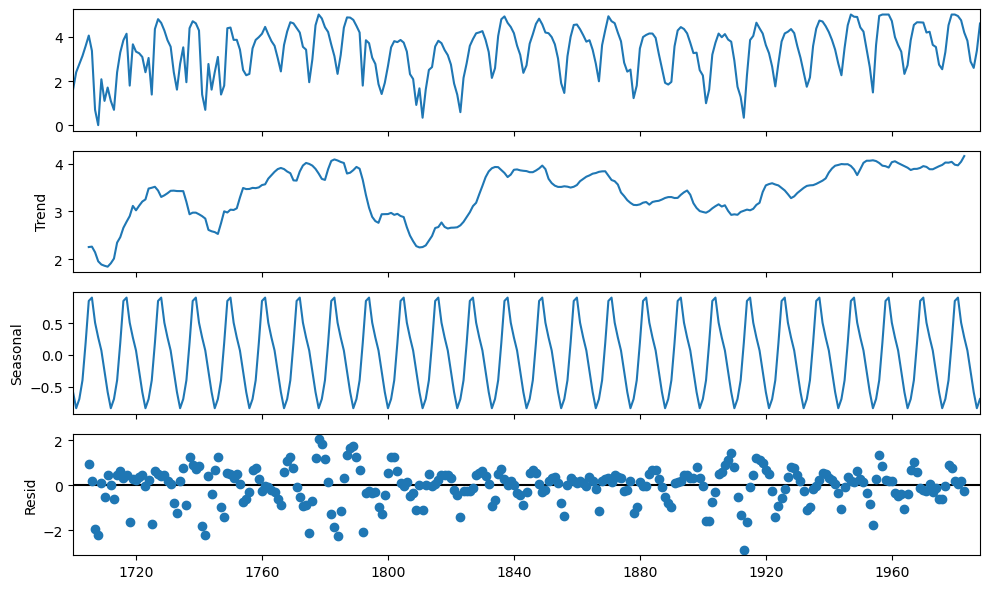

In [ ]:
decomp = seasonal_decompose(log_sunspot, model='additive', period=11)  # Effectue une décomposition saisonnière additive de la série 'y'
# decomp = seasonal_decompose(x, model='multiplicative')  # Effectue une décomposition saisonnière additive de la série 'y'

fig = decomp.plot()  # Génère le graphique des composantes de la décomposition (tendance, saisonnalité, résiduel)
fig.set_size_inches((10, 6))  # Définit la taille de la figure
fig.tight_layout()  # Ajuste automatiquement la disposition des sous-graphiques pour éviter le chevauchement
plt.show()  


c:\projects\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


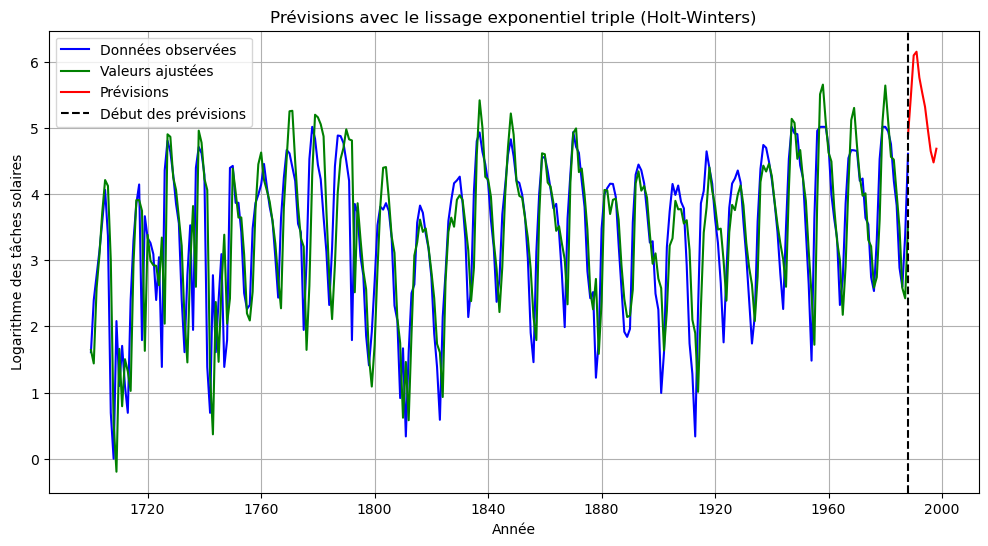

In [ ]:
# Appliquer la méthode Holt-Winters sur la série logarithmique
model = ExponentialSmoothing(
    log_sunspot,  # Série logarithmique
    trend="add",  # Tendance additive (car linéaire localement)
    seasonal="add",  # Composante saisonnière additive
    seasonal_periods=11  # Périodicité détectée (11 ans)
)
hw_model = model.fit()

# Ajouter les prévisions pour les 20 prochaines années
forecast_period = 11
forecast = hw_model.forecast(steps=forecast_period)

# Visualiser les résultats
plt.figure(figsize=(12, 6))
plt.plot(log_sunspot.index, log_sunspot, label="Données observées", color="blue")
plt.plot(log_sunspot.index, hw_model.fittedvalues, label="Valeurs ajustées", color="green")
plt.plot(
    pd.date_range(log_sunspot.index[-1], periods=forecast_period, freq="AS"),
    forecast,
    label="Prévisions",
    color="red",
)

# Ajouter une ligne verticale pour marquer le début des prévisions
plt.axvline(x=log_sunspot.index[-1], color='black', linestyle='--', label='Début des prévisions')

# Titre et légende
plt.title("Prévisions avec le lissage exponentiel triple (Holt-Winters)")
plt.xlabel("Année")
plt.ylabel("Logarithme des tâches solaires")
plt.legend()
plt.grid()
plt.show()


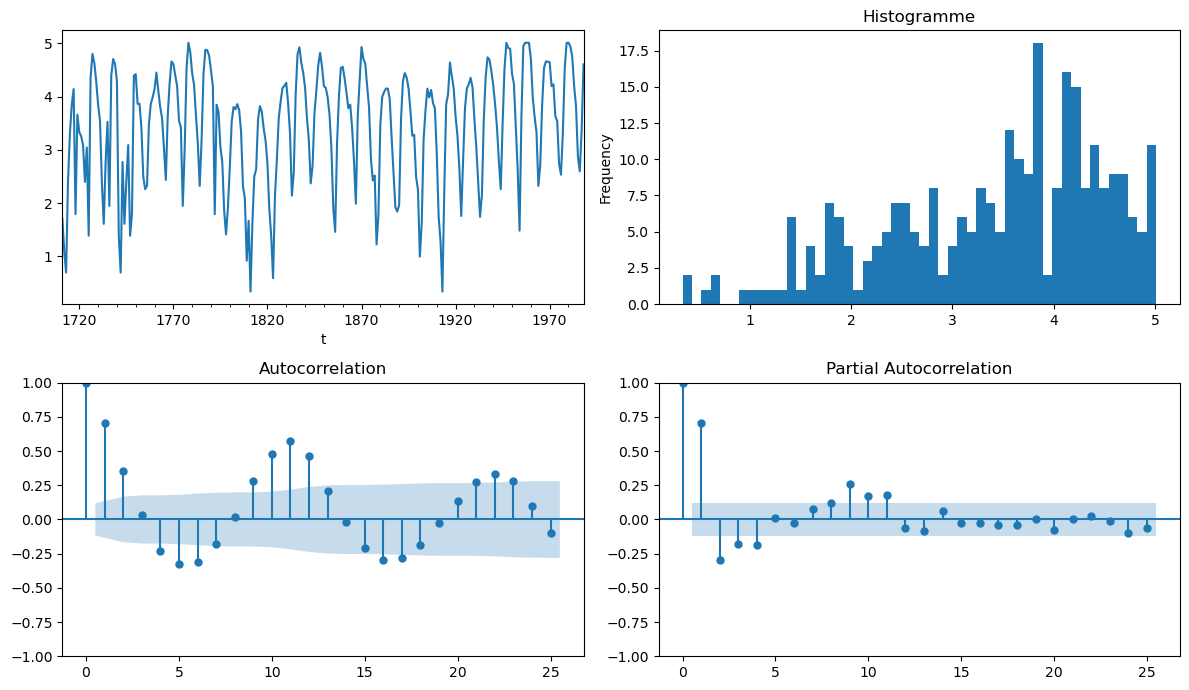

In [ ]:
fct.ts_plot(log_sunspot[11:].sunspot, fig_size=(12,7)) # Trace la série temporelle de la première dif


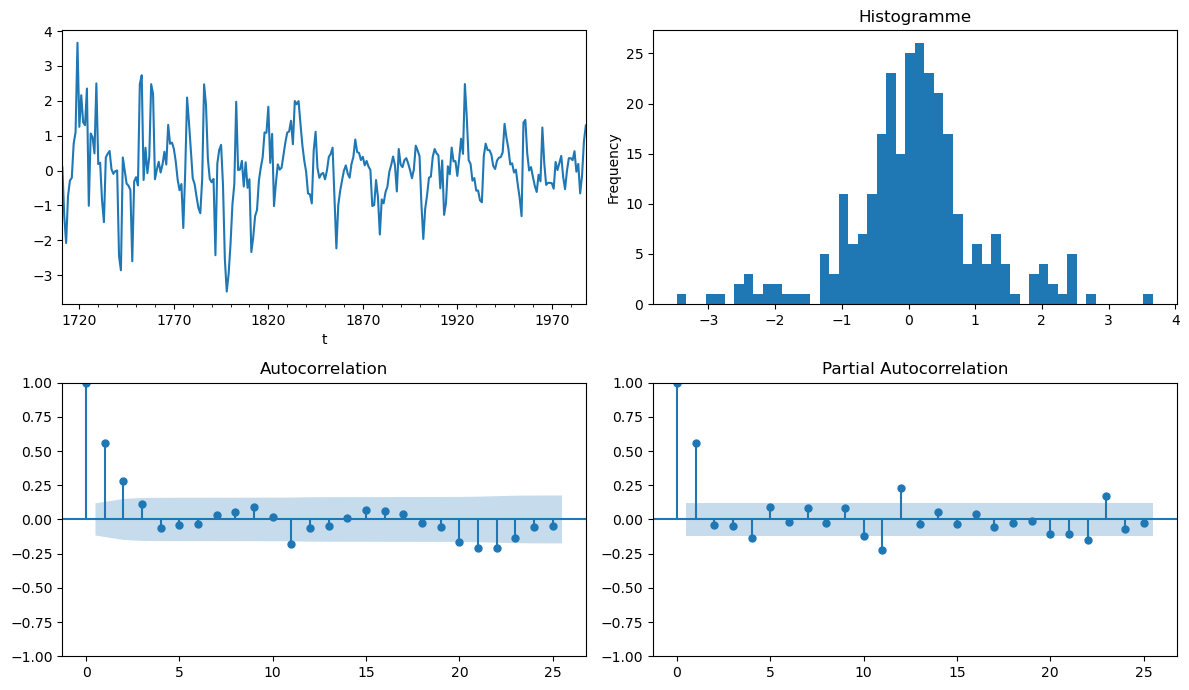

In [ ]:
y_diff_11 = log_sunspot- log_sunspot.shift(11) # La différence saisonnière sur 12 mois en soustrayant la valeur d'il y a

fct.ts_plot(y_diff_11[11:].sunspot, fig_size=(12,7)) # Trace la série temporelle de la première dif


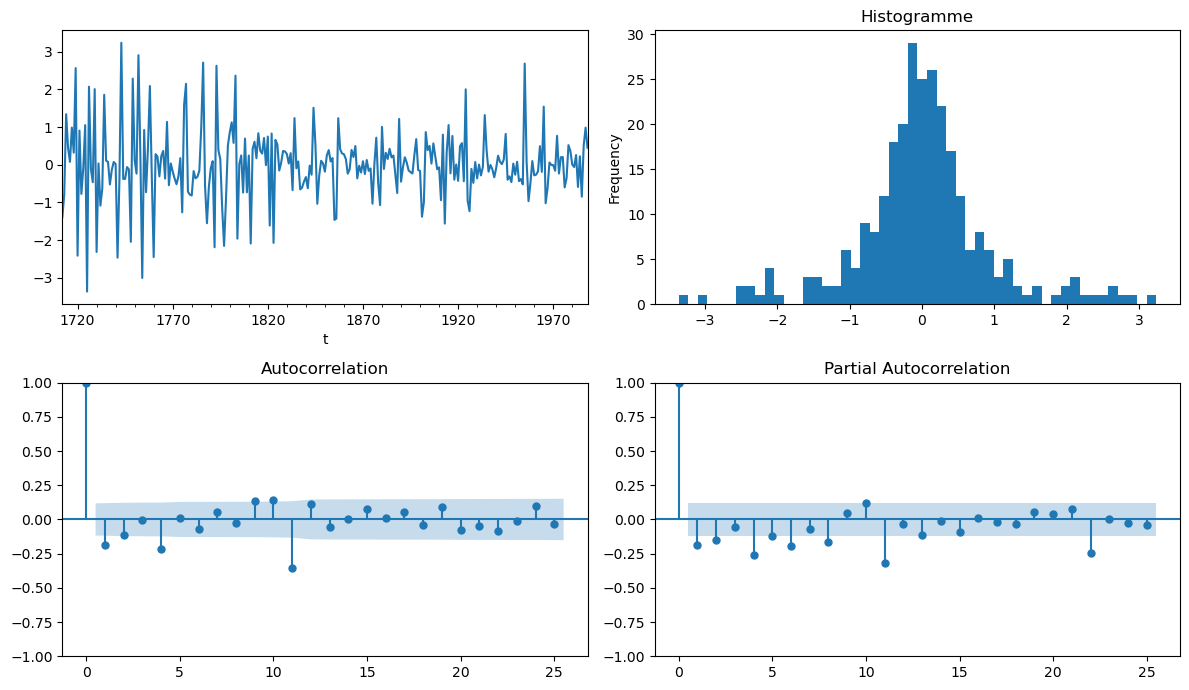

In [ ]:
y_diff_11_1 = y_diff_11- y_diff_11.shift(1) # Calcule la première différence de la série saisonnière
# en soustrayant la valeur précédente
# fct.plot_acf_pacf(y_diff_11_1[12:], fig_size=(9,5)) # Trace les fonctions d'autocorrélation (ACF),
# en excluant les 13 premières valeurs
fct.ts_plot(y_diff_11_1[12:].sunspot, fig_size=(12,7)) # Trace la série temporelle de la première dif


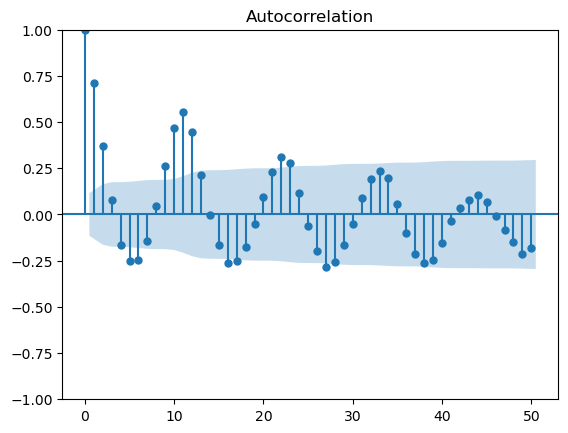

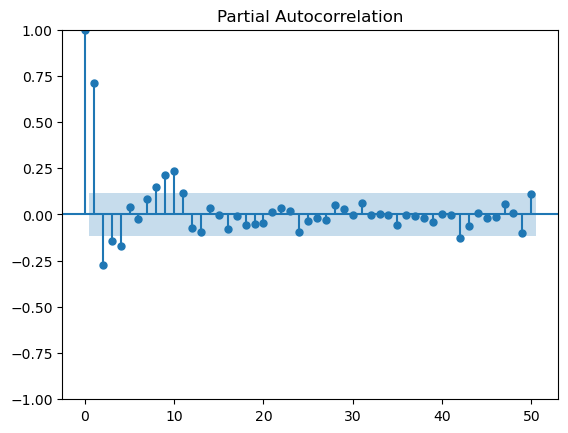

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(log_sunspot.values, lags=50)
plot_pacf(log_sunspot.values, lags=50)
plt.show()


In [ ]:
import itertools
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the range for parameters
p = q = range(0, 4)  # Range for p and q
P = Q = range(0, 3)  # Range for seasonal P and Q
d = range(0, 3)      # Range for non-seasonal differencing (d)
D = range(0, 3)      # Range for seasonal differencing (D)
seasonal_period = 11  # Seasonal period (adjust based on data)

# Generate all combinations of parameters
pdq = list(itertools.product(p, d, q))  # Non-seasonal differencing (d is included)
seasonal_pdq = [(x[0], X, x[1], seasonal_period) for X in D for x in itertools.product(P, Q)]  # Loop for seasonal differencing (D)

# List to store results
results = []

# Iterate over all combinations of parameters
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            # Fit SARIMAX model
            model = SARIMAX(x_train.values,
                            order=param,
                            seasonal_order=seasonal_param)
            result = model.fit(disp=False)
            
            # Append results
            results.append({
                'Order': param,
                'Seasonal_Order': seasonal_param,
                'AIC': result.aic
            })
        except Exception as e:
            # Skip invalid parameter combinations
            continue

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Sort by AIC to find the best model
best_model = results_df.loc[results_df['AIC'].idxmin()]
print("Best Model:")
print(best_model)

# Display all results sorted by AIC
print("\nAll Results (sorted by AIC):")
print(results_df.sort_values('AIC').head(10))  # Display top 10 models


On obtient les résultats suivants :  
Best Model:  
Order                 (1, 0, 1)  
Seasonal_Order    (2, 2, 2, 11)  
AIC                        14.0  
Name: 377, dtype: object  

All Results (sorted by AIC):  
         Order Seasonal_Order         AIC  
377  (1, 0, 1)  (2, 2, 2, 11)   14.000000  
94   (0, 0, 3)  (1, 1, 1, 11)  580.944674  
92   (0, 0, 3)  (0, 1, 2, 11)  581.242264  
95   (0, 0, 3)  (1, 1, 2, 11)  582.769466  
97   (0, 0, 3)  (2, 1, 1, 11)  582.786956  
98   (0, 0, 3)  (2, 1, 2, 11)  582.813787  
418  (1, 0, 3)  (1, 1, 1, 11)  582.943224  
416  (1, 0, 3)  (0, 1, 2, 11)  583.242260  
419  (1, 0, 3)  (1, 1, 2, 11)  584.769440  
421  (1, 0, 3)  (2, 1, 1, 11)  584.786936


In [ ]:
from statsmodels.tsa.statespace.sarimax import * # Importe le modèle SARIMAX de la bibliothèque stats

m1 = SARIMAX(x_train, order=(3,0,3), seasonal_order=(2,2,1,11)) # Crée un modèle SARIMAX avec ARIMA 
# order=(0,0,3), seasonal_order=(1,1,1,11)
# order=(1,0,1), seasonal_order=(2,2,2,11)
# order=(3,0,3), seasonal_order=(2,2,1,11) s.a

res1 = m1.fit(disp=False) # Ajuste le modèle aux données et évite d'afficher les messages de converge

print(res1.summary()) # Affiche un résumé des résultats du modèle ajusté, incluant les coefficients,
 # les erreurs standards, et d'autres statistiques

c:\projects\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\projects\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                              sunspot   No. Observations:                  273
Model:             SARIMAX(3, 0, 3)x(2, 2, [1], 11)   Log Likelihood                -313.892
Date:                              Mon, 23 Dec 2024   AIC                            647.783
Time:                                      23:06:29   BIC                            683.038
Sample:                                  01-01-1700   HQIC                           661.971
                                       - 01-01-1972                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1946      0.180     -1.082      0.279      -0.547       0.158
ar.L2         -0.22

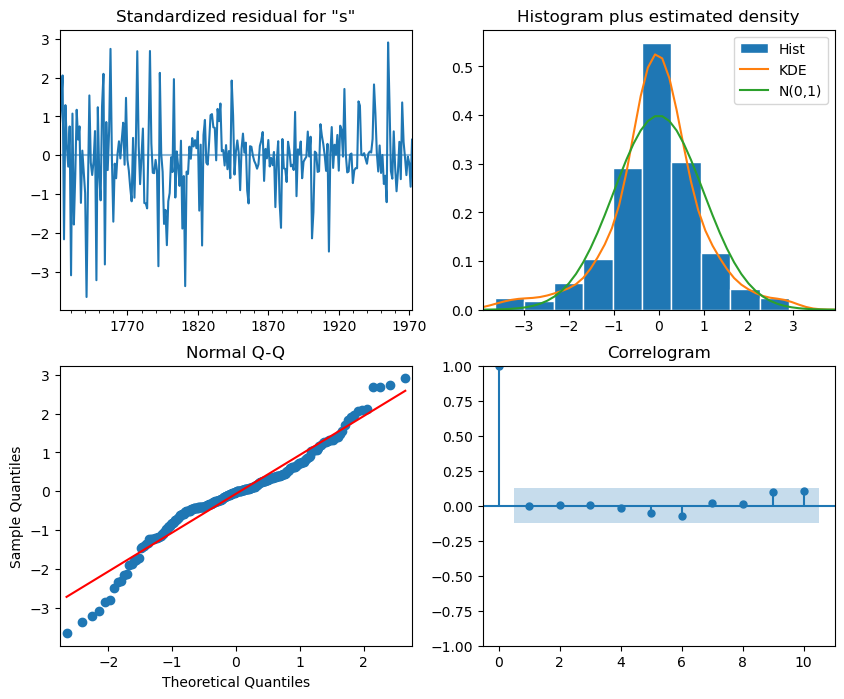

In [ ]:
res1.plot_diagnostics(figsize=(10, 8)); # Trace les diagnostics du modèle ajusté, incluant les résidu
# les tests de normalité, et les autocorréla

In [329]:
from statsmodels.tsa.statespace.sarimax import * # Importe le modèle SARIMAX de la bibliothèque stats

m1 = SARIMAX(x_train, order=(3,0,3), seasonal_order=(2,2,1,11)) # Crée un modèle SARIMAX avec ARIMA 
# order=(0,0,3), seasonal_order=(1,1,1,11)
# order=(1,0,1), seasonal_order=(2,2,2,11)
# order=(3,0,3), seasonal_order=(2,2,1,11) s.a

res1 = m1.fit(disp=False) # Ajuste le modèle aux données et évite d'afficher les messages de converge

print(res1.summary()) # Affiche un résumé des résultats du modèle ajusté, incluant les coefficients,
 # les erreurs standards, et d'autres statistiques

c:\projects\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\projects\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                              sunspot   No. Observations:                  273
Model:             SARIMAX(3, 0, 3)x(2, 2, [1], 11)   Log Likelihood                -313.892
Date:                              Mon, 23 Dec 2024   AIC                            647.783
Time:                                      23:06:29   BIC                            683.038
Sample:                                  01-01-1700   HQIC                           661.971
                                       - 01-01-1972                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1946      0.180     -1.082      0.279      -0.547       0.158
ar.L2         -0.22

<div style="background-color: #28a745; color: white; padding: 15px; border-radius: 5px;">
<h3>Interpretation des résultats</h3>

Le modèle SARIMAX ajusté a produit des résultats avec des coefficients significatifs, comme le montre la colonne **P>|z|**. Tous les coefficients ont des p-values proches de zéro (p < 0.05), ce qui indique qu'ils sont statistiquement significatifs. Plus précisément :

- Les coefficients de la moyenne mobile (ma.L1, ma.L2, ma.L3) ainsi que les coefficients saisonniers (ar.S.L11, ma.S.L11) ont des valeurs **P>|z|** inférieures à 0.05, ce qui confirme qu'ils contribuent de manière significative à l'ajustement du modèle.

Ces résultats suggèrent que le modèle SARIMAX est bien ajusté aux données, avec des termes qui ont une influence significative sur la prédiction des taches solaires.


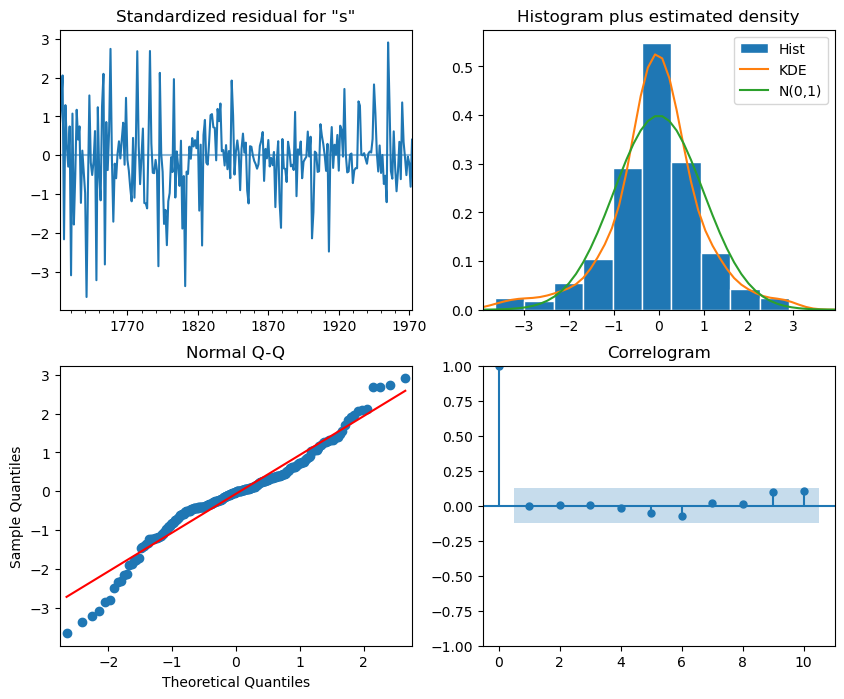

In [330]:
res1.plot_diagnostics(figsize=(10, 8)); # Trace les diagnostics du modèle ajusté, incluant les résidu
# les tests de normalité, et les autocorréla

<div style="background-color: #28a745; color: white; padding: 15px; border-radius: 5px;">
<h3>Interpretation des résultats</h3>

- Le corrélogramme montre que les valeurs d'autocorrélation des résidus sont proches de zéro et restent dans les limites de confiance (bandes bleues) pour tous les décalages. Cela indique qu'il n'y a pas d'autocorrélation significative dans les résidus, ce qui est un signe que le modèle a bien capturé la dépendance temporelle dans les données. 
- De plus, Les points du Q-Q plot suivent de près la ligne rouge, qui représente la distribution normale théorique.



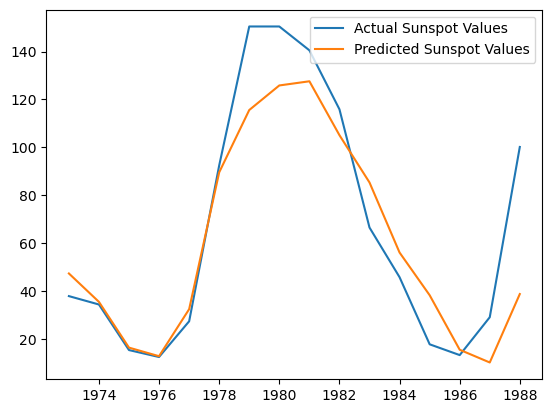

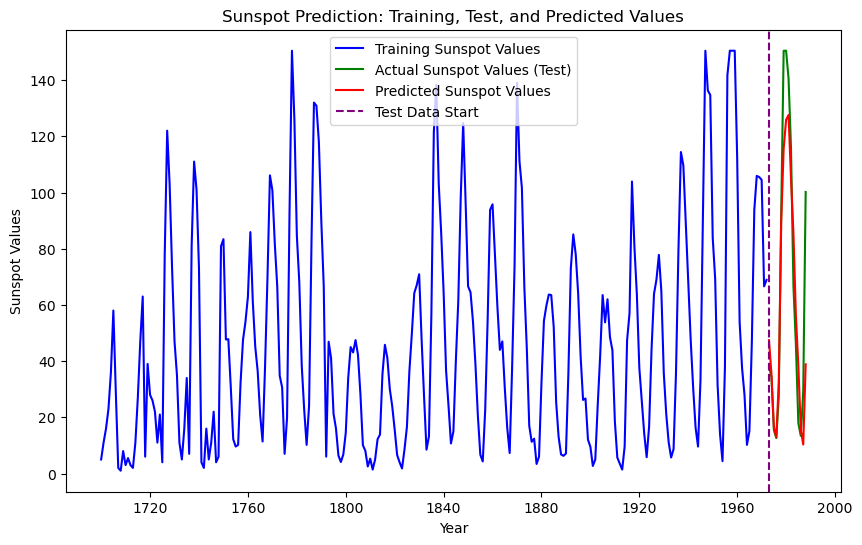

In [339]:
# Forecasting the next 'len(x_test)' time steps after the training period
predictions_log = res1.forecast(steps=len((x_test)))

# Exponentiate the predictions to get them back to the original sunspot values
predictions_sunspot = np.exp(predictions_log)

# Print the predictions
# print(predictions_sunspot)
# print(np.exp(x_test))

# Plotting actual vs. predicted sunspot values
plt.plot(x_test.index, np.exp(x_test), label='Actual Sunspot Values')  # Exponentiate to get original values
plt.plot(x_test.index, predictions_sunspot, label='Predicted Sunspot Values')
plt.legend()
plt.show()


# Forecasting the next 'len(x_test)' time steps after the training period
predictions_log = res1.forecast(steps=len(x_test))

# Exponentiate the predictions to get them back to the original sunspot values
predictions_sunspot = np.exp(predictions_log)

# Plotting the training data, actual test data, and predicted values
plt.figure(figsize=(10, 6))

# Plot the training data (log-transformed sunspot) up to the end of the training period
plt.plot(sunspot.index[:len(x_train)], np.exp(x_train), label='Training Sunspot Values', color='blue')

# Plot the actual test data (log-transformed sunspot) after the training period
plt.plot(x_test.index, np.exp(x_test), label='Actual Sunspot Values (Test)', color='green')

# Plot the predicted values (starting after the training period)
plt.plot(x_test.index, predictions_sunspot, label='Predicted Sunspot Values', color='red')

# Add vertical line to indicate the start of the test data
plt.axvline(x=x_test.index[0], color='purple', linestyle='--', label='Test Data Start')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Sunspot Values')
plt.title('Sunspot Prediction: Training, Test, and Predicted Values')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()

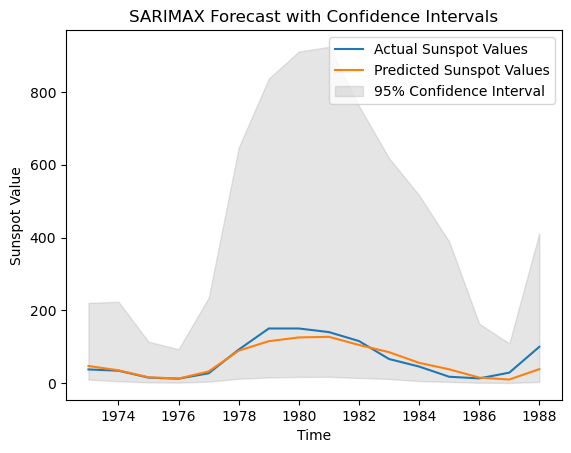

MAPE: 26.52%
RMSE: 21.26


In [370]:
from sklearn.metrics import mean_squared_error

# Get the confidence intervals
forecast = res1.get_forecast(steps=len(x_test))  # Get forecasted values
conf_int = forecast.conf_int()  # Get confidence intervals for the predictions
# Print the confidence intervals (lower and upper bounds)
# print(conf_int)
# Plotting actual vs. predicted sunspot values
plt.plot(x_test.index, np.exp(x_test), label='Actual Sunspot Values')  # Exponentiate to get original values
plt.plot(x_test.index, predictions_sunspot, label='Predicted Sunspot Values')
# Plotting the confidence intervals
plt.fill_between(x_test.index, np.exp(conf_int.iloc[:, 0]), np.exp(conf_int.iloc[:, 1]), color='gray', alpha=0.2, label='95% Confidence Interval')
# Add labels and legend
plt.title("SARIMAX Forecast with Confidence Intervals")
plt.xlabel("Time")
plt.ylabel("Sunspot Value")
plt.legend()
plt.show()

# Calculate MAPE
mape = np.mean(np.abs((np.exp(x_test) - predictions_sunspot) / np.exp(x_test))) * 100
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(np.exp(x_test), predictions_sunspot))
# Print the results
print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.2f}")


<div style="background-color: #28a745; color: white; padding: 15px; border-radius: 5px;">
<h3>Interprétation des résultats</h3>

Dans cette tâche de prévision, nous avons utilisé le modèle SARIMAX ajusté pour prédire les valeurs des taches solaires à partir de l'année 1973. Les étapes suivantes ont été réalisées :

1. **Prévision des valeurs log-transformées** : 
   - Nous avons prédit les valeurs de log des taches solaires pour les étapes futures (correspondant à la taille de `x_test`), et ces prévisions ont ensuite été exponentiées pour revenir aux valeurs d'origine des taches solaires.

2. **Comparaison des valeurs réelles et prédites** :
   - Nous avons tracé les valeurs réelles des taches solaires ainsi que les valeurs prédites pour visualiser la performance du modèle sur la période de test.

3. **Calcul des métriques de performance** :
   - **MAPE (Mean Absolute Percentage Error)** : Le MAPE a été calculé à 26.52%, ce qui signifie que, en moyenne, les prévisions diffèrent des valeurs réelles de 26.52%. Un MAPE élevé suggère que le modèle peut ne pas être suffisamment précis pour certaines applications.
   - **RMSE (Root Mean Squared Error)** : Le RMSE est de 21.26, ce qui mesure l'écart moyen entre les valeurs réelles et prédites en unités d'origine. Une valeur plus basse indique une meilleure précision des prévisions.

</div>


<div style="background-color: #28a745; color: white; padding: 15px; border-radius: 5px;">
<h3>Remarques et conclusions</h3>

En outre, j'ai testé différentes répartitions train/test avec des années allant de 1960 à 1975. Les résultats étaient très différents d'un split à l'autre, et il est apparu que le modèle a du mal à prédire de longues séquences sur plusieurs années. En effet, les scores de performance (MAPE et RMSE) chutent drastiquement après une certaine période. J'ai donc décidé de ne prédire qu'une seule période pour obtenir des résultats corrects et proches des données de test. 

Il est également important de noter que le fine-tuning des paramètres du modèle SARIMAX dépend fortement des données temporelles, et ces paramètres peuvent changer rapidement si l'on utilise des données légèrement différentes. Cette sensibilité aux variations des données souligne la complexité et la difficulté d'obtenir un modèle robuste sur de longues périodes.

De plus, l'augmentation de la quantité de données disponibles pourrait potentiellement permettre d'obtenir un modèle plus robuste. Avec plus de données, le modèle pourrait mieux capturer les tendances à long terme et les variations saisonnières, améliorant ainsi les prédictions sur des périodes plus longues. Cela pourrait également réduire la variance du modèle et améliorer la précision des prévisions dans des scénarios futurs, où les données de test couvrent plusieurs années.
